In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 32s 2us/step


In [3]:
df = pd.read_csv(csv_path)

In [6]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


We have this dataset for year 2009 - 2016 and a lil bit of 2017

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [8]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


Currently we hace this data set in a 10 minute nterval, we will now convert it into a  hour interval dataset

In [9]:
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


We will turn the index into a date time so its easier for us to do some stuff to this dataset \
`first 26 hours:`

In [13]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


We have so many features, f*ck them we'll just use the Temperature feature :)

<AxesSubplot:xlabel='Date Time'>

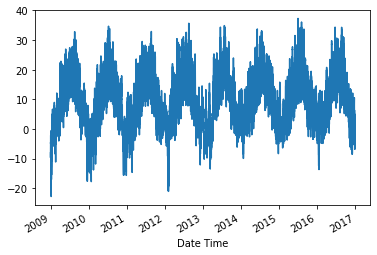

In [14]:
temp = df['T (degC)']
temp.plot()

Woah...that is a cool pattern right there... 

we will make an amazing function to make our lufe easier...

we will make a matrix for input data for our model (every 5 hours)

In [15]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size = 5):
    df_np = df.to_numpy()
    X = [] # first five values
    y = [] # output (the next 6th value)
    for i in range(len(df_np)-window_size):
        row = [[a] for a in df_np[i:i+5]]
        X.append(row)
        label = df_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [16]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp,WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

##### Splitting the X y in train val and test

In [20]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [22]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((60000, 5, 1), (5086, 5, 1), (5000, 5, 1), (60000,), (5086,), (5000,))

#### Creating a model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint # to save the model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1))) # a batch of 5
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear')) # output

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [24]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [25]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, callbacks=[cp])

Epoch 1/100
1864/1875 [============================>.] - ETA: 0s - loss: 126.9266 - root_mean_squared_error: 11.2662

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 21s 10ms/step - loss: 126.7261 - root_mean_squared_error: 11.2573 - val_loss: 35.8184 - val_root_mean_squared_error: 5.9848
Epoch 2/100
1875/1875 [==============================] - ETA: 0s - loss: 65.7650 - root_mean_squared_error: 8.1096

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 65.7650 - root_mean_squared_error: 8.1096 - val_loss: 14.7166 - val_root_mean_squared_error: 3.8362
Epoch 3/100
1858/1875 [============================>.] - ETA: 0s - loss: 32.8022 - root_mean_squared_error: 5.7273

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 32.6953 - root_mean_squared_error: 5.7180 - val_loss: 6.3477 - val_root_mean_squared_error: 2.5195
Epoch 4/100
1875/1875 [==============================] - ETA: 0s - loss: 16.5790 - root_mean_squared_error: 4.0717

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 16.5790 - root_mean_squared_error: 4.0717 - val_loss: 3.2943 - val_root_mean_squared_error: 1.8150
Epoch 5/100
1865/1875 [============================>.] - ETA: 0s - loss: 9.6037 - root_mean_squared_error: 3.0990

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 9.5798 - root_mean_squared_error: 3.0951 - val_loss: 2.2572 - val_root_mean_squared_error: 1.5024
Epoch 6/100
1869/1875 [============================>.] - ETA: 0s - loss: 6.4134 - root_mean_squared_error: 2.5325

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 6.4048 - root_mean_squared_error: 2.5308 - val_loss: 1.7393 - val_root_mean_squared_error: 1.3188
Epoch 7/100
1860/1875 [============================>.] - ETA: 0s - loss: 4.6629 - root_mean_squared_error: 2.1594

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 4.6563 - root_mean_squared_error: 2.1578 - val_loss: 1.4095 - val_root_mean_squared_error: 1.1872
Epoch 8/100
1865/1875 [============================>.] - ETA: 0s - loss: 3.5380 - root_mean_squared_error: 1.8810

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 3.5383 - root_mean_squared_error: 1.8810 - val_loss: 1.1831 - val_root_mean_squared_error: 1.0877
Epoch 9/100
1856/1875 [============================>.] - ETA: 0s - loss: 2.7816 - root_mean_squared_error: 1.6678

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 2.7785 - root_mean_squared_error: 1.6669 - val_loss: 1.0176 - val_root_mean_squared_error: 1.0088
Epoch 10/100
1867/1875 [============================>.] - ETA: 0s - loss: 2.2383 - root_mean_squared_error: 1.4961

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 2.2381 - root_mean_squared_error: 1.4960 - val_loss: 0.8857 - val_root_mean_squared_error: 0.9411
Epoch 11/100
1875/1875 [==============================] - ETA: 0s - loss: 1.8441 - root_mean_squared_error: 1.3580

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 1.8441 - root_mean_squared_error: 1.3580 - val_loss: 0.7811 - val_root_mean_squared_error: 0.8838
Epoch 12/100
1863/1875 [============================>.] - ETA: 0s - loss: 1.5494 - root_mean_squared_error: 1.2448

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 1.5475 - root_mean_squared_error: 1.2440 - val_loss: 0.7061 - val_root_mean_squared_error: 0.8403
Epoch 13/100
1868/1875 [============================>.] - ETA: 0s - loss: 1.3274 - root_mean_squared_error: 1.1521

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 1.3280 - root_mean_squared_error: 1.1524 - val_loss: 0.6532 - val_root_mean_squared_error: 0.8082
Epoch 14/100
1862/1875 [============================>.] - ETA: 0s - loss: 1.1679 - root_mean_squared_error: 1.0807

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 1.1663 - root_mean_squared_error: 1.0800 - val_loss: 0.6199 - val_root_mean_squared_error: 0.7873
Epoch 15/100
1869/1875 [============================>.] - ETA: 0s - loss: 1.0478 - root_mean_squared_error: 1.0236

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 1.0472 - root_mean_squared_error: 1.0233 - val_loss: 0.5954 - val_root_mean_squared_error: 0.7716
Epoch 16/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.9612 - root_mean_squared_error: 0.9804

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.9608 - root_mean_squared_error: 0.9802 - val_loss: 0.5752 - val_root_mean_squared_error: 0.7584
Epoch 17/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.8977 - root_mean_squared_error: 0.9475

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.8975 - root_mean_squared_error: 0.9474 - val_loss: 0.5649 - val_root_mean_squared_error: 0.7516
Epoch 18/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.8500 - root_mean_squared_error: 0.9220

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.8510 - root_mean_squared_error: 0.9225 - val_loss: 0.5558 - val_root_mean_squared_error: 0.7455
Epoch 19/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.8153 - root_mean_squared_error: 0.9030

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.8156 - root_mean_squared_error: 0.9031 - val_loss: 0.5466 - val_root_mean_squared_error: 0.7393
Epoch 20/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.7884 - root_mean_squared_error: 0.8879

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.7881 - root_mean_squared_error: 0.8878 - val_loss: 0.5379 - val_root_mean_squared_error: 0.7334
Epoch 21/100
1861/1875 [============================>.] - ETA: 0s - loss: 0.7660 - root_mean_squared_error: 0.8752

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.7660 - root_mean_squared_error: 0.8752 - val_loss: 0.5341 - val_root_mean_squared_error: 0.7308
Epoch 22/100
1856/1875 [============================>.] - ETA: 0s - loss: 0.7493 - root_mean_squared_error: 0.8656

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.7482 - root_mean_squared_error: 0.8650 - val_loss: 0.5236 - val_root_mean_squared_error: 0.7236
Epoch 23/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.7331 - root_mean_squared_error: 0.8562

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.7342 - root_mean_squared_error: 0.8569 - val_loss: 0.5202 - val_root_mean_squared_error: 0.7213
Epoch 24/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.7226 - root_mean_squared_error: 0.8501

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.7227 - root_mean_squared_error: 0.8501 - val_loss: 0.5152 - val_root_mean_squared_error: 0.7178
Epoch 25/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.7141 - root_mean_squared_error: 0.8451

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.7134 - root_mean_squared_error: 0.8446 - val_loss: 0.5106 - val_root_mean_squared_error: 0.7146
Epoch 26/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7061 - root_mean_squared_error: 0.8403 - val_loss: 0.5131 - val_root_mean_squared_error: 0.7163
Epoch 27/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6999 - root_mean_squared_error: 0.8366 - val_loss: 0.5138 - val_root_mean_squared_error: 0.7168
Epoch 28/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.6961 - root_mean_squared_error: 0.8343

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6949 - root_mean_squared_error: 0.8336 - val_loss: 0.5091 - val_root_mean_squared_error: 0.7135
Epoch 29/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6906 - root_mean_squared_error: 0.8310 - val_loss: 0.5146 - val_root_mean_squared_error: 0.7174
Epoch 30/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.6874 - root_mean_squared_error: 0.8291

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6871 - root_mean_squared_error: 0.8289 - val_loss: 0.5053 - val_root_mean_squared_error: 0.7109
Epoch 31/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6839 - root_mean_squared_error: 0.8270 - val_loss: 0.5109 - val_root_mean_squared_error: 0.7148
Epoch 32/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.6821 - root_mean_squared_error: 0.8259

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6811 - root_mean_squared_error: 0.8253 - val_loss: 0.5032 - val_root_mean_squared_error: 0.7094
Epoch 33/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6784 - root_mean_squared_error: 0.8237 - val_loss: 0.5035 - val_root_mean_squared_error: 0.7096
Epoch 34/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.6764 - root_mean_squared_error: 0.8224

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6762 - root_mean_squared_error: 0.8223 - val_loss: 0.5028 - val_root_mean_squared_error: 0.7091
Epoch 35/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.6743 - root_mean_squared_error: 0.8212

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6742 - root_mean_squared_error: 0.8211 - val_loss: 0.5003 - val_root_mean_squared_error: 0.7073
Epoch 36/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6724 - root_mean_squared_error: 0.8200 - val_loss: 0.5063 - val_root_mean_squared_error: 0.7115
Epoch 37/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6706 - root_mean_squared_error: 0.8189 - val_loss: 0.5016 - val_root_mean_squared_error: 0.7083
Epoch 38/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6688 - root_mean_squared_error: 0.8178 - val_loss: 0.5036 - val_root_mean_squared_error: 0.7096
Epoch 39/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6675 - root_mean_squared_error: 0.8170 - val_loss: 0.5054 - val_root_mean_squared_error: 0.7109
Epoch 40/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.6656 - root_mean_squared_error: 0.8159

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6660 - root_mean_squared_error: 0.8161 - val_loss: 0.4997 - val_root_mean_squared_error: 0.7069
Epoch 41/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6650 - root_mean_squared_error: 0.8155 - val_loss: 0.5001 - val_root_mean_squared_error: 0.7072
Epoch 42/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6638 - root_mean_squared_error: 0.8147 - val_loss: 0.5023 - val_root_mean_squared_error: 0.7087
Epoch 43/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6628 - root_mean_squared_error: 0.8141 - val_loss: 0.5025 - val_root_mean_squared_error: 0.7088
Epoch 44/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6618 - root_mean_squared_error: 0.8135 - val_loss: 0.5034 - val_root_mean_squared_error: 0.7095
Epoch 45/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.6612 - root_mean_squared_error: 0.8131

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6605 - root_mean_squared_error: 0.8127 - val_loss: 0.4985 - val_root_mean_squared_error: 0.7061
Epoch 46/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6603 - root_mean_squared_error: 0.8126 - val_loss: 0.5012 - val_root_mean_squared_error: 0.7079
Epoch 47/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6591 - root_mean_squared_error: 0.8119 - val_loss: 0.5026 - val_root_mean_squared_error: 0.7089
Epoch 48/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6585 - root_mean_squared_error: 0.8115 - val_loss: 0.4998 - val_root_mean_squared_error: 0.7070
Epoch 49/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6575 - root_mean_squared_error: 0.8109 - val_loss: 0.5020 - val_root_mean_squared_error: 0.7085
Epoch 50/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6567 - root_mean_squared_error: 0.8104 - val_loss: 0

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6563 - root_mean_squared_error: 0.8101 - val_loss: 0.4978 - val_root_mean_squared_error: 0.7055
Epoch 52/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6554 - root_mean_squared_error: 0.8096 - val_loss: 0.5049 - val_root_mean_squared_error: 0.7106
Epoch 53/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6548 - root_mean_squared_error: 0.8092 - val_loss: 0.5020 - val_root_mean_squared_error: 0.7086
Epoch 54/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6543 - root_mean_squared_error: 0.8089 - val_loss: 0.5001 - val_root_mean_squared_error: 0.7072
Epoch 55/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.6530 - root_mean_squared_error: 0.8081

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6538 - root_mean_squared_error: 0.8085 - val_loss: 0.4964 - val_root_mean_squared_error: 0.7045
Epoch 56/100
1861/1875 [============================>.] - ETA: 0s - loss: 0.6540 - root_mean_squared_error: 0.8087

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.6532 - root_mean_squared_error: 0.8082 - val_loss: 0.4963 - val_root_mean_squared_error: 0.7045
Epoch 57/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6524 - root_mean_squared_error: 0.8077 - val_loss: 0.4980 - val_root_mean_squared_error: 0.7057
Epoch 58/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6521 - root_mean_squared_error: 0.8075 - val_loss: 0.4980 - val_root_mean_squared_error: 0.7057
Epoch 59/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6518 - root_mean_squared_error: 0.8073 - val_loss: 0.5015 - val_root_mean_squared_error: 0.7082
Epoch 60/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6512 - root_mean_squared_error: 0.8070 - val_loss: 0.4995 - val_root_mean_squared_error: 0.7067
Epoch 61/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6504 - root_mean_squared_error: 0.8065 - val_loss: 0

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6495 - root_mean_squared_error: 0.8059 - val_loss: 0.4961 - val_root_mean_squared_error: 0.7044
Epoch 65/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6490 - root_mean_squared_error: 0.8056 - val_loss: 0.5003 - val_root_mean_squared_error: 0.7073
Epoch 66/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6485 - root_mean_squared_error: 0.8053 - val_loss: 0.5018 - val_root_mean_squared_error: 0.7083
Epoch 67/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6479 - root_mean_squared_error: 0.8050 - val_loss: 0.4972 - val_root_mean_squared_error: 0.7051
Epoch 68/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6478 - root_mean_squared_error: 0.8049 - val_loss: 0.4983 - val_root_mean_squared_error: 0.7059
Epoch 69/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.6481 - root_mean_squared_error: 0.8051

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6475 - root_mean_squared_error: 0.8046 - val_loss: 0.4923 - val_root_mean_squared_error: 0.7017
Epoch 70/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6470 - root_mean_squared_error: 0.8044 - val_loss: 0.4967 - val_root_mean_squared_error: 0.7047
Epoch 71/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6466 - root_mean_squared_error: 0.8041 - val_loss: 0.4943 - val_root_mean_squared_error: 0.7031
Epoch 72/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6462 - root_mean_squared_error: 0.8039 - val_loss: 0.4985 - val_root_mean_squared_error: 0.7061
Epoch 73/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6459 - root_mean_squared_error: 0.8037 - val_loss: 0.4987 - val_root_mean_squared_error: 0.7062
Epoch 74/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6457 - root_mean_squared_error: 0.8036 - val_loss: 0

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.6450 - root_mean_squared_error: 0.8031 - val_loss: 0.4913 - val_root_mean_squared_error: 0.7009
Epoch 77/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6445 - root_mean_squared_error: 0.8028 - val_loss: 0.4962 - val_root_mean_squared_error: 0.7044
Epoch 78/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.6443 - root_mean_squared_error: 0.8027

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6444 - root_mean_squared_error: 0.8028 - val_loss: 0.4895 - val_root_mean_squared_error: 0.6997
Epoch 79/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6442 - root_mean_squared_error: 0.8026 - val_loss: 0.4977 - val_root_mean_squared_error: 0.7055
Epoch 80/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6439 - root_mean_squared_error: 0.8024 - val_loss: 0.4932 - val_root_mean_squared_error: 0.7023
Epoch 81/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6434 - root_mean_squared_error: 0.8021 - val_loss: 0.5001 - val_root_mean_squared_error: 0.7072
Epoch 82/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6431 - root_mean_squared_error: 0.8019 - val_loss: 0.4941 - val_root_mean_squared_error: 0.7029
Epoch 83/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6429 - root_mean_squared_error: 0.8018 - val_loss: 0

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6397 - root_mean_squared_error: 0.7998 - val_loss: 0.4887 - val_root_mean_squared_error: 0.6991
Epoch 98/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6396 - root_mean_squared_error: 0.7997 - val_loss: 0.4936 - val_root_mean_squared_error: 0.7026
Epoch 99/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6393 - root_mean_squared_error: 0.7996 - val_loss: 0.4963 - val_root_mean_squared_error: 0.7045
Epoch 100/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6391 - root_mean_squared_error: 0.7994 - val_loss: 0.4902 - val_root_mean_squared_error: 0.7001


In [26]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [31]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame({"Train Predictions": train_predictions, "Actuals": y_train})
train_results

1875/1875 [==============================] - 3s 1ms/step


,Train Predictions,Actuals
0,-9.874640,-9.67
1,-9.717672,-9.17
2,-8.776578,-8.10
3,-7.289771,-7.66
4,-7.146247,-7.04
...,...,...
59995,6.118192,6.07
59996,7.264373,9.88
59997,12.330401,13.53
59998,16.024273,15.43


Text(0.5, 1.0, 'Train dataset')

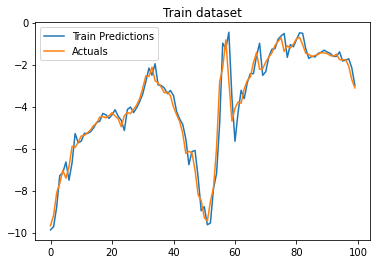

In [41]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])
plt.legend(["Train Predictions","Actuals"])
plt.title('Train dataset')

In [35]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame({"Validation Predictions": val_predictions, "Actuals": y_val})
val_results

157/157 [==============================] - 0s 1ms/step


,Validation Predictions,Actuals
0,15.387779,14.02
1,13.203417,13.67
2,13.103407,12.27
3,11.527019,11.19
4,10.443669,10.85
...,...,...
4995,17.356825,18.27
4996,17.407610,17.85
4997,17.182362,16.65
4998,15.873108,15.85


Text(0.5, 1.0, 'Validation dataset')

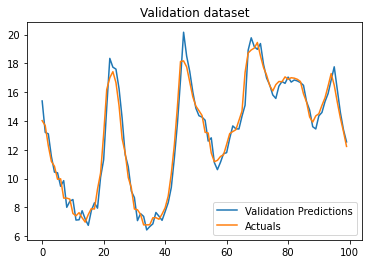

In [40]:
import matplotlib.pyplot as plt
plt.plot(val_results['Validation Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
plt.legend(["Validation Predictions","Actuals"])
plt.title('Validation dataset')

In [37]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame({"Test Predictions": test_predictions, "Actuals": y_test})
test_results

159/159 [==============================] - 0s 1ms/step


,Test Predictions,Actuals
0,14.415404,13.99
1,13.277983,13.46
2,12.901031,12.93
3,12.492652,12.43
4,12.058166,12.17
...,...,...
5081,-0.968966,-0.98
5082,-1.542173,-1.40
5083,-1.761845,-2.75
5084,-3.199624,-2.89


Text(0.5, 1.0, 'Test dataset')

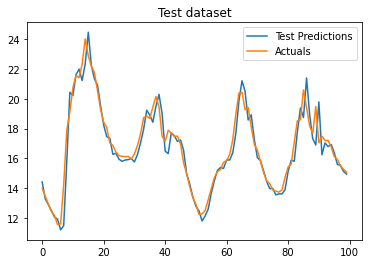

In [39]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])
plt.legend(["Test Predictions","Actuals"])
plt.title('Test dataset')

# Lets use different models
### 1DCNN

In [43]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data = {"Predictions": predictions, "Actuals": y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    plt.legend(["Predictions","Actuals"])
    return df, mse(y, predictions)

159/159 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       14.415404    13.99
 1       13.277983    13.46
 2       12.901031    12.93
 3       12.492652    12.43
 4       12.058166    12.17
 ...           ...      ...
 5081    -0.968966    -0.98
 5082    -1.542173    -1.40
 5083    -1.761845    -2.75
 5084    -3.199624    -2.89
 5085    -3.149828    -3.93
 
 [5086 rows x 2 columns],
 0.6262389605045895)

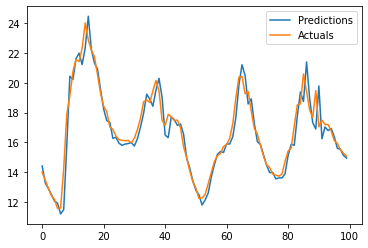

In [44]:
plot_predictions1(model1, X_test, y_test)

In [45]:
model2 = Sequential()
model2.add(InputLayer((5,1))) # a batch of 5
model2.add(Conv1D(64, kernel_size=2)) # kernel takes 2 things and turns them into 1 and it will do this 64 times
model2.add(Flatten()) # 1D
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear')) # output

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


Woah....those are very less parameters than the LSTM model (model1)

Lower the parameters in the model (complexity), faster the model

In [46]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [47]:
model2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, callbacks=[cp2])

Epoch 1/100
1855/1875 [============================>.] - ETA: 0s - loss: 38.2425 - root_mean_squared_error: 6.1841

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 37.9370 - root_mean_squared_error: 6.1593 - val_loss: 5.2339 - val_root_mean_squared_error: 2.2878
Epoch 2/100
1854/1875 [============================>.] - ETA: 0s - loss: 8.9848 - root_mean_squared_error: 2.9975

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 8.9807 - root_mean_squared_error: 2.9968 - val_loss: 4.2681 - val_root_mean_squared_error: 2.0659
Epoch 3/100
1859/1875 [============================>.] - ETA: 0s - loss: 6.8876 - root_mean_squared_error: 2.6244

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 5s 3ms/step - loss: 6.8730 - root_mean_squared_error: 2.6216 - val_loss: 3.0784 - val_root_mean_squared_error: 1.7545
Epoch 4/100
1835/1875 [============================>.] - ETA: 0s - loss: 4.5885 - root_mean_squared_error: 2.1421

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 4.5620 - root_mean_squared_error: 2.1359 - val_loss: 1.9991 - val_root_mean_squared_error: 1.4139
Epoch 5/100
1873/1875 [============================>.] - ETA: 0s - loss: 2.6923 - root_mean_squared_error: 1.6408

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 2.6907 - root_mean_squared_error: 1.6403 - val_loss: 1.3088 - val_root_mean_squared_error: 1.1440
Epoch 6/100
1875/1875 [==============================] - ETA: 0s - loss: 1.6536 - root_mean_squared_error: 1.2859

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 1.6536 - root_mean_squared_error: 1.2859 - val_loss: 1.0281 - val_root_mean_squared_error: 1.0140
Epoch 7/100
1865/1875 [============================>.] - ETA: 0s - loss: 1.2982 - root_mean_squared_error: 1.1394

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 1.2979 - root_mean_squared_error: 1.1393 - val_loss: 0.9433 - val_root_mean_squared_error: 0.9712
Epoch 8/100
1870/1875 [============================>.] - ETA: 0s - loss: 1.1750 - root_mean_squared_error: 1.0840

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 1.1745 - root_mean_squared_error: 1.0837 - val_loss: 0.8682 - val_root_mean_squared_error: 0.9318
Epoch 9/100
1864/1875 [============================>.] - ETA: 0s - loss: 1.0898 - root_mean_squared_error: 1.0439

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 1.0890 - root_mean_squared_error: 1.0435 - val_loss: 0.8152 - val_root_mean_squared_error: 0.9029
Epoch 10/100
1855/1875 [============================>.] - ETA: 0s - loss: 1.0219 - root_mean_squared_error: 1.0109

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 1.0216 - root_mean_squared_error: 1.0107 - val_loss: 0.7862 - val_root_mean_squared_error: 0.8867
Epoch 11/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.9676 - root_mean_squared_error: 0.9837

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 6s 3ms/step - loss: 0.9676 - root_mean_squared_error: 0.9837 - val_loss: 0.7470 - val_root_mean_squared_error: 0.8643
Epoch 12/100
1822/1875 [============================>.] - ETA: 0s - loss: 0.9212 - root_mean_squared_error: 0.9598

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.9232 - root_mean_squared_error: 0.9609 - val_loss: 0.7188 - val_root_mean_squared_error: 0.8478
Epoch 13/100
1843/1875 [============================>.] - ETA: 0s - loss: 0.8881 - root_mean_squared_error: 0.9424

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.8868 - root_mean_squared_error: 0.9417 - val_loss: 0.6889 - val_root_mean_squared_error: 0.8300
Epoch 14/100
1852/1875 [============================>.] - ETA: 0s - loss: 0.8562 - root_mean_squared_error: 0.9253

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.8565 - root_mean_squared_error: 0.9255 - val_loss: 0.6632 - val_root_mean_squared_error: 0.8144
Epoch 15/100
1855/1875 [============================>.] - ETA: 0s - loss: 0.8318 - root_mean_squared_error: 0.9120

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.8318 - root_mean_squared_error: 0.9121 - val_loss: 0.6508 - val_root_mean_squared_error: 0.8067
Epoch 16/100
1825/1875 [============================>.] - ETA: 0s - loss: 0.8100 - root_mean_squared_error: 0.9000

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.8110 - root_mean_squared_error: 0.9006 - val_loss: 0.6424 - val_root_mean_squared_error: 0.8015
Epoch 17/100
1845/1875 [============================>.] - ETA: 0s - loss: 0.7933 - root_mean_squared_error: 0.8907

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.7939 - root_mean_squared_error: 0.8910 - val_loss: 0.6199 - val_root_mean_squared_error: 0.7873
Epoch 18/100
1815/1875 [============================>.] - ETA: 0s - loss: 0.7783 - root_mean_squared_error: 0.8822

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.7797 - root_mean_squared_error: 0.8830 - val_loss: 0.6084 - val_root_mean_squared_error: 0.7800
Epoch 19/100
1850/1875 [============================>.] - ETA: 0s - loss: 0.7644 - root_mean_squared_error: 0.8743

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7670 - root_mean_squared_error: 0.8758 - val_loss: 0.5984 - val_root_mean_squared_error: 0.7735
Epoch 20/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.7559 - root_mean_squared_error: 0.8694

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7562 - root_mean_squared_error: 0.8696 - val_loss: 0.5885 - val_root_mean_squared_error: 0.7671
Epoch 21/100
1827/1875 [============================>.] - ETA: 0s - loss: 0.7480 - root_mean_squared_error: 0.8649

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.7474 - root_mean_squared_error: 0.8645 - val_loss: 0.5835 - val_root_mean_squared_error: 0.7639
Epoch 22/100
1833/1875 [============================>.] - ETA: 0s - loss: 0.7398 - root_mean_squared_error: 0.8601

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.7390 - root_mean_squared_error: 0.8597 - val_loss: 0.5746 - val_root_mean_squared_error: 0.7580
Epoch 23/100
1824/1875 [============================>.] - ETA: 0s - loss: 0.7314 - root_mean_squared_error: 0.8552

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7318 - root_mean_squared_error: 0.8554 - val_loss: 0.5669 - val_root_mean_squared_error: 0.7529
Epoch 24/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.7262 - root_mean_squared_error: 0.8522

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7255 - root_mean_squared_error: 0.8518 - val_loss: 0.5633 - val_root_mean_squared_error: 0.7506
Epoch 25/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.7198 - root_mean_squared_error: 0.8484

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7198 - root_mean_squared_error: 0.8484 - val_loss: 0.5614 - val_root_mean_squared_error: 0.7493
Epoch 26/100
1850/1875 [============================>.] - ETA: 0s - loss: 0.7156 - root_mean_squared_error: 0.8459

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7146 - root_mean_squared_error: 0.8454 - val_loss: 0.5520 - val_root_mean_squared_error: 0.7430
Epoch 27/100
1846/1875 [============================>.] - ETA: 0s - loss: 0.7061 - root_mean_squared_error: 0.8403

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7099 - root_mean_squared_error: 0.8426 - val_loss: 0.5481 - val_root_mean_squared_error: 0.7403
Epoch 28/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.7053 - root_mean_squared_error: 0.8398

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7053 - root_mean_squared_error: 0.8398 - val_loss: 0.5439 - val_root_mean_squared_error: 0.7375
Epoch 29/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.7007 - root_mean_squared_error: 0.8371

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.7014 - root_mean_squared_error: 0.8375 - val_loss: 0.5402 - val_root_mean_squared_error: 0.7350
Epoch 30/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.6979 - root_mean_squared_error: 0.8354

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6981 - root_mean_squared_error: 0.8355 - val_loss: 0.5395 - val_root_mean_squared_error: 0.7345
Epoch 31/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.6961 - root_mean_squared_error: 0.8343

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6946 - root_mean_squared_error: 0.8335 - val_loss: 0.5384 - val_root_mean_squared_error: 0.7337
Epoch 32/100
1845/1875 [============================>.] - ETA: 0s - loss: 0.6893 - root_mean_squared_error: 0.8303

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6912 - root_mean_squared_error: 0.8314 - val_loss: 0.5338 - val_root_mean_squared_error: 0.7306
Epoch 33/100
1875/1875 [==============================] - 2s 958us/step - loss: 0.6887 - root_mean_squared_error: 0.8299 - val_loss: 0.5351 - val_root_mean_squared_error: 0.7315
Epoch 34/100
1851/1875 [============================>.] - ETA: 0s - loss: 0.6863 - root_mean_squared_error: 0.8284

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6860 - root_mean_squared_error: 0.8282 - val_loss: 0.5321 - val_root_mean_squared_error: 0.7295
Epoch 35/100
1846/1875 [============================>.] - ETA: 0s - loss: 0.6843 - root_mean_squared_error: 0.8272

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6835 - root_mean_squared_error: 0.8268 - val_loss: 0.5271 - val_root_mean_squared_error: 0.7260
Epoch 36/100
1863/1875 [============================>.] - ETA: 0s - loss: 0.6810 - root_mean_squared_error: 0.8252

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6813 - root_mean_squared_error: 0.8254 - val_loss: 0.5228 - val_root_mean_squared_error: 0.7230
Epoch 37/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.6791 - root_mean_squared_error: 0.8241

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6792 - root_mean_squared_error: 0.8241 - val_loss: 0.5214 - val_root_mean_squared_error: 0.7220
Epoch 38/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6777 - root_mean_squared_error: 0.8232 - val_loss: 0.5283 - val_root_mean_squared_error: 0.7269
Epoch 39/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6758 - root_mean_squared_error: 0.8221 - val_loss: 0.5218 - val_root_mean_squared_error: 0.7224
Epoch 40/100
1850/1875 [============================>.] - ETA: 0s - loss: 0.6734 - root_mean_squared_error: 0.8206

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6741 - root_mean_squared_error: 0.8210 - val_loss: 0.5175 - val_root_mean_squared_error: 0.7194
Epoch 41/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.6739 - root_mean_squared_error: 0.8209

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6730 - root_mean_squared_error: 0.8204 - val_loss: 0.5171 - val_root_mean_squared_error: 0.7191
Epoch 42/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.6718 - root_mean_squared_error: 0.8197

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6714 - root_mean_squared_error: 0.8194 - val_loss: 0.5160 - val_root_mean_squared_error: 0.7184
Epoch 43/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6698 - root_mean_squared_error: 0.8184 - val_loss: 0.5173 - val_root_mean_squared_error: 0.7193
Epoch 44/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.6689 - root_mean_squared_error: 0.8179

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6687 - root_mean_squared_error: 0.8178 - val_loss: 0.5151 - val_root_mean_squared_error: 0.7177
Epoch 45/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6677 - root_mean_squared_error: 0.8172 - val_loss: 0.5162 - val_root_mean_squared_error: 0.7184
Epoch 46/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6669 - root_mean_squared_error: 0.8167 - val_loss: 0.5174 - val_root_mean_squared_error: 0.7193
Epoch 47/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6657 - root_mean_squared_error: 0.8159 - val_loss: 0.5183 - val_root_mean_squared_error: 0.7199
Epoch 48/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6648 - root_mean_squared_error: 0.8153 - val_loss: 0.5191 - val_root_mean_squared_error: 0.7205
Epoch 49/100
1834/1875 [============================>.] - ETA: 0s - loss: 0.6622 - root_mean_squared_error: 0.8138

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6639 - root_mean_squared_error: 0.8148 - val_loss: 0.5116 - val_root_mean_squared_error: 0.7152
Epoch 50/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6628 - root_mean_squared_error: 0.8141 - val_loss: 0.5121 - val_root_mean_squared_error: 0.7156
Epoch 51/100
1840/1875 [============================>.] - ETA: 0s - loss: 0.6624 - root_mean_squared_error: 0.8139

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6619 - root_mean_squared_error: 0.8135 - val_loss: 0.5090 - val_root_mean_squared_error: 0.7134
Epoch 52/100
1840/1875 [============================>.] - ETA: 0s - loss: 0.6617 - root_mean_squared_error: 0.8134

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6615 - root_mean_squared_error: 0.8133 - val_loss: 0.5089 - val_root_mean_squared_error: 0.7134
Epoch 53/100
1875/1875 [==============================] - 2s 967us/step - loss: 0.6608 - root_mean_squared_error: 0.8129 - val_loss: 0.5101 - val_root_mean_squared_error: 0.7142
Epoch 54/100
1875/1875 [==============================] - ETA: 0s - loss: 0.6601 - root_mean_squared_error: 0.8125

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6601 - root_mean_squared_error: 0.8125 - val_loss: 0.5057 - val_root_mean_squared_error: 0.7111
Epoch 55/100
1875/1875 [==============================] - 2s 939us/step - loss: 0.6600 - root_mean_squared_error: 0.8124 - val_loss: 0.5097 - val_root_mean_squared_error: 0.7140
Epoch 56/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6590 - root_mean_squared_error: 0.8118 - val_loss: 0.5060 - val_root_mean_squared_error: 0.7113
Epoch 57/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.6572 - root_mean_squared_error: 0.8107

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6581 - root_mean_squared_error: 0.8112 - val_loss: 0.5056 - val_root_mean_squared_error: 0.7110
Epoch 58/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.6585 - root_mean_squared_error: 0.8115

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6581 - root_mean_squared_error: 0.8112 - val_loss: 0.5043 - val_root_mean_squared_error: 0.7102
Epoch 59/100
1875/1875 [==============================] - 2s 923us/step - loss: 0.6572 - root_mean_squared_error: 0.8107 - val_loss: 0.5057 - val_root_mean_squared_error: 0.7111
Epoch 60/100
1875/1875 [==============================] - 2s 970us/step - loss: 0.6569 - root_mean_squared_error: 0.8105 - val_loss: 0.5075 - val_root_mean_squared_error: 0.7124
Epoch 61/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6563 - root_mean_squared_error: 0.8101 - val_loss: 0.5058 - val_root_mean_squared_error: 0.7112
Epoch 62/100
1856/1875 [============================>.] - ETA: 0s - loss: 0.6555 - root_mean_squared_error: 0.8096

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6556 - root_mean_squared_error: 0.8097 - val_loss: 0.5038 - val_root_mean_squared_error: 0.7098
Epoch 63/100
1875/1875 [==============================] - 2s 921us/step - loss: 0.6557 - root_mean_squared_error: 0.8098 - val_loss: 0.5045 - val_root_mean_squared_error: 0.7103
Epoch 64/100
1835/1875 [============================>.] - ETA: 0s - loss: 0.6544 - root_mean_squared_error: 0.8090

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6551 - root_mean_squared_error: 0.8094 - val_loss: 0.5033 - val_root_mean_squared_error: 0.7094
Epoch 65/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.6546 - root_mean_squared_error: 0.8091

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6546 - root_mean_squared_error: 0.8091 - val_loss: 0.5010 - val_root_mean_squared_error: 0.7078
Epoch 66/100
1830/1875 [============================>.] - ETA: 0s - loss: 0.6538 - root_mean_squared_error: 0.8086

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6541 - root_mean_squared_error: 0.8088 - val_loss: 0.5007 - val_root_mean_squared_error: 0.7076
Epoch 67/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6540 - root_mean_squared_error: 0.8087 - val_loss: 0.5035 - val_root_mean_squared_error: 0.7096
Epoch 68/100
1875/1875 [==============================] - 2s 940us/step - loss: 0.6534 - root_mean_squared_error: 0.8083 - val_loss: 0.5019 - val_root_mean_squared_error: 0.7084
Epoch 69/100
1824/1875 [============================>.] - ETA: 0s - loss: 0.6560 - root_mean_squared_error: 0.8100

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6532 - root_mean_squared_error: 0.8082 - val_loss: 0.5002 - val_root_mean_squared_error: 0.7072
Epoch 70/100
1875/1875 [==============================] - 2s 960us/step - loss: 0.6531 - root_mean_squared_error: 0.8081 - val_loss: 0.5044 - val_root_mean_squared_error: 0.7102
Epoch 71/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6525 - root_mean_squared_error: 0.8078 - val_loss: 0.5068 - val_root_mean_squared_error: 0.7119
Epoch 72/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6521 - root_mean_squared_error: 0.8075 - val_loss: 0.5078 - val_root_mean_squared_error: 0.7126
Epoch 73/100
1863/1875 [============================>.] - ETA: 0s - loss: 0.6513 - root_mean_squared_error: 0.8070

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6523 - root_mean_squared_error: 0.8076 - val_loss: 0.4990 - val_root_mean_squared_error: 0.7064
Epoch 74/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6516 - root_mean_squared_error: 0.8072 - val_loss: 0.5045 - val_root_mean_squared_error: 0.7103
Epoch 75/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6514 - root_mean_squared_error: 0.8071 - val_loss: 0.4998 - val_root_mean_squared_error: 0.7070
Epoch 76/100
1821/1875 [============================>.] - ETA: 0s - loss: 0.6523 - root_mean_squared_error: 0.8077

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6509 - root_mean_squared_error: 0.8068 - val_loss: 0.4971 - val_root_mean_squared_error: 0.7051
Epoch 77/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6507 - root_mean_squared_error: 0.8067 - val_loss: 0.5031 - val_root_mean_squared_error: 0.7093
Epoch 78/100
1875/1875 [==============================] - 2s 989us/step - loss: 0.6504 - root_mean_squared_error: 0.8065 - val_loss: 0.4995 - val_root_mean_squared_error: 0.7068
Epoch 79/100
1875/1875 [==============================] - 2s 993us/step - loss: 0.6503 - root_mean_squared_error: 0.8064 - val_loss: 0.4987 - val_root_mean_squared_error: 0.7062
Epoch 80/100
1875/1875 [==============================] - 2s 957us/step - loss: 0.6501 - root_mean_squared_error: 0.8063 - val_loss: 0.4992 - val_root_mean_squared_error: 0.7065
Epoch 81/100
1875/1875 [==============================] - 2s 941us/step - loss: 0.6502 - root_mean_squared_error: 0.8063 - val_

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6495 - root_mean_squared_error: 0.8059 - val_loss: 0.4958 - val_root_mean_squared_error: 0.7041
Epoch 84/100
1875/1875 [==============================] - 2s 934us/step - loss: 0.6495 - root_mean_squared_error: 0.8059 - val_loss: 0.4984 - val_root_mean_squared_error: 0.7060
Epoch 85/100
1821/1875 [============================>.] - ETA: 0s - loss: 0.6490 - root_mean_squared_error: 0.8056

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6489 - root_mean_squared_error: 0.8056 - val_loss: 0.4957 - val_root_mean_squared_error: 0.7040
Epoch 86/100
1875/1875 [==============================] - 2s 939us/step - loss: 0.6491 - root_mean_squared_error: 0.8056 - val_loss: 0.4980 - val_root_mean_squared_error: 0.7057
Epoch 87/100
1875/1875 [==============================] - 2s 938us/step - loss: 0.6486 - root_mean_squared_error: 0.8054 - val_loss: 0.4972 - val_root_mean_squared_error: 0.7051
Epoch 88/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6486 - root_mean_squared_error: 0.8054 - val_loss: 0.4958 - val_root_mean_squared_error: 0.7041
Epoch 89/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6486 - root_mean_squared_error: 0.8054 - val_loss: 0.5005 - val_root_mean_squared_error: 0.7074
Epoch 90/100
1824/1875 [============================>.] - ETA: 0s - loss: 0.6472 - root_mean_squared_error: 0.8045

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6482 - root_mean_squared_error: 0.8051 - val_loss: 0.4946 - val_root_mean_squared_error: 0.7033
Epoch 91/100
1875/1875 [==============================] - 2s 930us/step - loss: 0.6482 - root_mean_squared_error: 0.8051 - val_loss: 0.4950 - val_root_mean_squared_error: 0.7036
Epoch 92/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.6470 - root_mean_squared_error: 0.8044

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6477 - root_mean_squared_error: 0.8048 - val_loss: 0.4942 - val_root_mean_squared_error: 0.7030
Epoch 93/100
1875/1875 [==============================] - 2s 950us/step - loss: 0.6479 - root_mean_squared_error: 0.8049 - val_loss: 0.4992 - val_root_mean_squared_error: 0.7065
Epoch 94/100
1875/1875 [==============================] - 2s 924us/step - loss: 0.6479 - root_mean_squared_error: 0.8049 - val_loss: 0.4969 - val_root_mean_squared_error: 0.7049
Epoch 95/100
1875/1875 [==============================] - 2s 923us/step - loss: 0.6473 - root_mean_squared_error: 0.8045 - val_loss: 0.4962 - val_root_mean_squared_error: 0.7044
Epoch 96/100
1875/1875 [==============================] - 2s 963us/step - loss: 0.6470 - root_mean_squared_error: 0.8044 - val_loss: 0.4949 - val_root_mean_squared_error: 0.7035
Epoch 97/100
1875/1875 [==============================] - 2s 941us/step - loss: 0.6471 - root_mean_squared_error: 0.8045 - va

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6468 - root_mean_squared_error: 0.8043 - val_loss: 0.4926 - val_root_mean_squared_error: 0.7019


159/159 [==============================] - 0s 1ms/step


(      Predictions  Actuals
 0       14.342990    13.99
 1       13.147723    13.46
 2       12.863708    12.93
 3       12.445944    12.43
 4       12.009718    12.17
 ...           ...      ...
 5081    -0.939604    -0.98
 5082    -1.417286    -1.40
 5083    -1.686782    -2.75
 5084    -3.125515    -2.89
 5085    -3.191079    -3.93
 
 [5086 rows x 2 columns],
 0.6432495954489904)

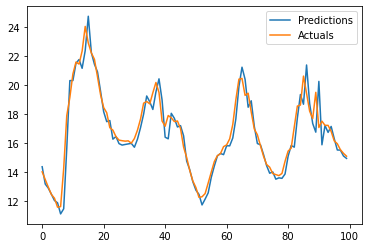

In [48]:
plot_predictions1(model2, X_test, y_test)

### GRU {Gated recurrent unit}
- more likke LSTM

Gated recurrent units (GRUs) are a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al.[1] The GRU is like a long short-term memory (LSTM) with a forget gate,[2] but has fewer parameters than LSTM, as it lacks an output gate.[3] GRU's performance on certain tasks of polyphonic music modeling, speech signal modeling and natural language processing was found to be similar to that of LSTM.[4][5] GRUs have been shown to exhibit better performance on certain smaller and less frequent datasets
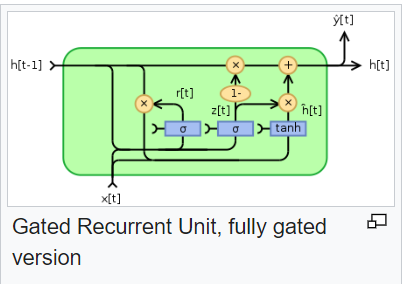

In [50]:
model3 = Sequential()
model3.add(InputLayer((5,1))) # a batch of 5
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear')) # output

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [51]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [52]:
model3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, callbacks=[cp3])

Epoch 1/100
1872/1875 [============================>.] - ETA: 0s - loss: 91.2728 - root_mean_squared_error: 9.5537

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 18s 8ms/step - loss: 91.2456 - root_mean_squared_error: 9.5523 - val_loss: 18.9403 - val_root_mean_squared_error: 4.3520
Epoch 2/100
1864/1875 [============================>.] - ETA: 0s - loss: 40.6704 - root_mean_squared_error: 6.3773

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 40.5770 - root_mean_squared_error: 6.3700 - val_loss: 7.9412 - val_root_mean_squared_error: 2.8180
Epoch 3/100
1872/1875 [============================>.] - ETA: 0s - loss: 18.6598 - root_mean_squared_error: 4.3197

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 18.6478 - root_mean_squared_error: 4.3183 - val_loss: 3.0357 - val_root_mean_squared_error: 1.7423
Epoch 4/100
1854/1875 [============================>.] - ETA: 0s - loss: 9.1992 - root_mean_squared_error: 3.0330

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 9.1720 - root_mean_squared_error: 3.0285 - val_loss: 1.7428 - val_root_mean_squared_error: 1.3202
Epoch 5/100
1870/1875 [============================>.] - ETA: 0s - loss: 5.2436 - root_mean_squared_error: 2.2899

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 5.2370 - root_mean_squared_error: 2.2885 - val_loss: 1.2476 - val_root_mean_squared_error: 1.1170
Epoch 6/100
1870/1875 [============================>.] - ETA: 0s - loss: 3.3193 - root_mean_squared_error: 1.8219

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 14s 8ms/step - loss: 3.3183 - root_mean_squared_error: 1.8216 - val_loss: 1.0325 - val_root_mean_squared_error: 1.0161
Epoch 7/100
1863/1875 [============================>.] - ETA: 0s - loss: 2.3580 - root_mean_squared_error: 1.5356

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 16s 9ms/step - loss: 2.3570 - root_mean_squared_error: 1.5352 - val_loss: 0.9044 - val_root_mean_squared_error: 0.9510
Epoch 8/100
1861/1875 [============================>.] - ETA: 0s - loss: 1.8585 - root_mean_squared_error: 1.3633

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 1.8540 - root_mean_squared_error: 1.3616 - val_loss: 0.8229 - val_root_mean_squared_error: 0.9071
Epoch 9/100
1856/1875 [============================>.] - ETA: 0s - loss: 1.5648 - root_mean_squared_error: 1.2509

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 1.5619 - root_mean_squared_error: 1.2498 - val_loss: 0.7497 - val_root_mean_squared_error: 0.8658
Epoch 10/100
1864/1875 [============================>.] - ETA: 0s - loss: 1.3723 - root_mean_squared_error: 1.1715

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 14s 8ms/step - loss: 1.3711 - root_mean_squared_error: 1.1709 - val_loss: 0.6972 - val_root_mean_squared_error: 0.8350
Epoch 11/100
1871/1875 [============================>.] - ETA: 0s - loss: 1.2342 - root_mean_squared_error: 1.1110

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 1.2327 - root_mean_squared_error: 1.1103 - val_loss: 0.6542 - val_root_mean_squared_error: 0.8088
Epoch 12/100
1867/1875 [============================>.] - ETA: 0s - loss: 1.1277 - root_mean_squared_error: 1.0619

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 16s 9ms/step - loss: 1.1274 - root_mean_squared_error: 1.0618 - val_loss: 0.6178 - val_root_mean_squared_error: 0.7860
Epoch 13/100
1853/1875 [============================>.] - ETA: 0s - loss: 1.0457 - root_mean_squared_error: 1.0226

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 1.0445 - root_mean_squared_error: 1.0220 - val_loss: 0.5947 - val_root_mean_squared_error: 0.7711
Epoch 14/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.9776 - root_mean_squared_error: 0.9887

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.9771 - root_mean_squared_error: 0.9885 - val_loss: 0.5683 - val_root_mean_squared_error: 0.7538
Epoch 15/100
1852/1875 [============================>.] - ETA: 0s - loss: 0.9220 - root_mean_squared_error: 0.9602

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.9232 - root_mean_squared_error: 0.9608 - val_loss: 0.5556 - val_root_mean_squared_error: 0.7454
Epoch 16/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.8805 - root_mean_squared_error: 0.9384

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.8797 - root_mean_squared_error: 0.9379 - val_loss: 0.5407 - val_root_mean_squared_error: 0.7353
Epoch 17/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.8450 - root_mean_squared_error: 0.9192

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.8444 - root_mean_squared_error: 0.9189 - val_loss: 0.5338 - val_root_mean_squared_error: 0.7306
Epoch 18/100
1854/1875 [============================>.] - ETA: 0s - loss: 0.8156 - root_mean_squared_error: 0.9031

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.8156 - root_mean_squared_error: 0.9031 - val_loss: 0.5264 - val_root_mean_squared_error: 0.7255
Epoch 19/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.7929 - root_mean_squared_error: 0.8904

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.7916 - root_mean_squared_error: 0.8897 - val_loss: 0.5243 - val_root_mean_squared_error: 0.7241
Epoch 20/100
1853/1875 [============================>.] - ETA: 0s - loss: 0.7709 - root_mean_squared_error: 0.8780

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.7718 - root_mean_squared_error: 0.8785 - val_loss: 0.5197 - val_root_mean_squared_error: 0.7209
Epoch 21/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7558 - root_mean_squared_error: 0.8693 - val_loss: 0.5243 - val_root_mean_squared_error: 0.7241
Epoch 22/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.7424 - root_mean_squared_error: 0.8616

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.7422 - root_mean_squared_error: 0.8615 - val_loss: 0.5157 - val_root_mean_squared_error: 0.7181
Epoch 23/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.7308 - root_mean_squared_error: 0.8549

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.7306 - root_mean_squared_error: 0.8548 - val_loss: 0.5080 - val_root_mean_squared_error: 0.7127
Epoch 24/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7208 - root_mean_squared_error: 0.8490 - val_loss: 0.5093 - val_root_mean_squared_error: 0.7136
Epoch 25/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7124 - root_mean_squared_error: 0.8440 - val_loss: 0.5101 - val_root_mean_squared_error: 0.7142
Epoch 26/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7047 - root_mean_squared_error: 0.8394 - val_loss: 0.5095 - val_root_mean_squared_error: 0.7138
Epoch 27/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6984 - root_mean_squared_error: 0.8357 - val_loss: 0.5084 - val_root_mean_squared_error: 0.7130
Epoch 28/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6926 - root_mean_squared_error: 0.8322 - val_loss: 0

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6877 - root_mean_squared_error: 0.8293 - val_loss: 0.5040 - val_root_mean_squared_error: 0.7099
Epoch 30/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6830 - root_mean_squared_error: 0.8265 - val_loss: 0.5059 - val_root_mean_squared_error: 0.7113
Epoch 31/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6793 - root_mean_squared_error: 0.8242 - val_loss: 0.5111 - val_root_mean_squared_error: 0.7149
Epoch 32/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6758 - root_mean_squared_error: 0.8220 - val_loss: 0.5065 - val_root_mean_squared_error: 0.7117
Epoch 33/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.6732 - root_mean_squared_error: 0.8205

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.6728 - root_mean_squared_error: 0.8202 - val_loss: 0.5026 - val_root_mean_squared_error: 0.7090
Epoch 34/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.6690 - root_mean_squared_error: 0.8180

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6699 - root_mean_squared_error: 0.8185 - val_loss: 0.5026 - val_root_mean_squared_error: 0.7090
Epoch 35/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6676 - root_mean_squared_error: 0.8170 - val_loss: 0.5029 - val_root_mean_squared_error: 0.7092
Epoch 36/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.6644 - root_mean_squared_error: 0.8151

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6653 - root_mean_squared_error: 0.8157 - val_loss: 0.4979 - val_root_mean_squared_error: 0.7056
Epoch 37/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6632 - root_mean_squared_error: 0.8144 - val_loss: 0.5008 - val_root_mean_squared_error: 0.7077
Epoch 38/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6613 - root_mean_squared_error: 0.8132 - val_loss: 0.5010 - val_root_mean_squared_error: 0.7078
Epoch 39/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.6601 - root_mean_squared_error: 0.8125

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6600 - root_mean_squared_error: 0.8124 - val_loss: 0.4961 - val_root_mean_squared_error: 0.7044
Epoch 40/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6584 - root_mean_squared_error: 0.8114 - val_loss: 0.5009 - val_root_mean_squared_error: 0.7078
Epoch 41/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6572 - root_mean_squared_error: 0.8107 - val_loss: 0.5042 - val_root_mean_squared_error: 0.7101
Epoch 42/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.6563 - root_mean_squared_error: 0.8101

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6560 - root_mean_squared_error: 0.8100 - val_loss: 0.4954 - val_root_mean_squared_error: 0.7039
Epoch 43/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6546 - root_mean_squared_error: 0.8091 - val_loss: 0.4968 - val_root_mean_squared_error: 0.7049
Epoch 44/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6537 - root_mean_squared_error: 0.8085 - val_loss: 0.4958 - val_root_mean_squared_error: 0.7041
Epoch 45/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6526 - root_mean_squared_error: 0.8078 - val_loss: 0.4998 - val_root_mean_squared_error: 0.7069
Epoch 46/100
1850/1875 [============================>.] - ETA: 0s - loss: 0.6515 - root_mean_squared_error: 0.8072

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.6520 - root_mean_squared_error: 0.8075 - val_loss: 0.4952 - val_root_mean_squared_error: 0.7037
Epoch 47/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6510 - root_mean_squared_error: 0.8069 - val_loss: 0.4956 - val_root_mean_squared_error: 0.7040
Epoch 48/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.6499 - root_mean_squared_error: 0.8061

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6504 - root_mean_squared_error: 0.8065 - val_loss: 0.4939 - val_root_mean_squared_error: 0.7027
Epoch 49/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6496 - root_mean_squared_error: 0.8059 - val_loss: 0.4946 - val_root_mean_squared_error: 0.7033
Epoch 50/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6490 - root_mean_squared_error: 0.8056 - val_loss: 0.5002 - val_root_mean_squared_error: 0.7073
Epoch 51/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6486 - root_mean_squared_error: 0.8053 - val_loss: 0.4978 - val_root_mean_squared_error: 0.7056
Epoch 52/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6478 - root_mean_squared_error: 0.8049 - val_loss: 0.5010 - val_root_mean_squared_error: 0.7078
Epoch 53/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6471 - root_mean_squared_error: 0.8044 - val_loss: 0

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6462 - root_mean_squared_error: 0.8039 - val_loss: 0.4932 - val_root_mean_squared_error: 0.7023
Epoch 56/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6457 - root_mean_squared_error: 0.8035 - val_loss: 0.4974 - val_root_mean_squared_error: 0.7052
Epoch 57/100
1872/1875 [============================>.] - ETA: 0s - loss: 0.6446 - root_mean_squared_error: 0.8029

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.6452 - root_mean_squared_error: 0.8033 - val_loss: 0.4911 - val_root_mean_squared_error: 0.7008
Epoch 58/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6446 - root_mean_squared_error: 0.8029 - val_loss: 0.4933 - val_root_mean_squared_error: 0.7024
Epoch 59/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6446 - root_mean_squared_error: 0.8028 - val_loss: 0.4964 - val_root_mean_squared_error: 0.7045
Epoch 60/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6438 - root_mean_squared_error: 0.8024 - val_loss: 0.4959 - val_root_mean_squared_error: 0.7042
Epoch 61/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6438 - root_mean_squared_error: 0.8024 - val_loss: 0.4959 - val_root_mean_squared_error: 0.7042
Epoch 62/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6435 - root_mean_squared_error: 0.8022 - val_loss: 0

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6414 - root_mean_squared_error: 0.8009 - val_loss: 0.4888 - val_root_mean_squared_error: 0.6991
Epoch 69/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6412 - root_mean_squared_error: 0.8007 - val_loss: 0.5006 - val_root_mean_squared_error: 0.7075
Epoch 70/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6409 - root_mean_squared_error: 0.8006 - val_loss: 0.4916 - val_root_mean_squared_error: 0.7012
Epoch 71/100
1855/1875 [============================>.] - ETA: 0s - loss: 0.6410 - root_mean_squared_error: 0.8007

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.6406 - root_mean_squared_error: 0.8004 - val_loss: 0.4882 - val_root_mean_squared_error: 0.6987
Epoch 72/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6406 - root_mean_squared_error: 0.8004 - val_loss: 0.4894 - val_root_mean_squared_error: 0.6996
Epoch 73/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6400 - root_mean_squared_error: 0.8000 - val_loss: 0.5005 - val_root_mean_squared_error: 0.7075
Epoch 74/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6400 - root_mean_squared_error: 0.8000 - val_loss: 0.4921 - val_root_mean_squared_error: 0.7015
Epoch 75/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6397 - root_mean_squared_error: 0.7998 - val_loss: 0.4921 - val_root_mean_squared_error: 0.7015
Epoch 76/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.6373 - root_mean_squared_error: 0.7983

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6392 - root_mean_squared_error: 0.7995 - val_loss: 0.4870 - val_root_mean_squared_error: 0.6978
Epoch 77/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6393 - root_mean_squared_error: 0.7996 - val_loss: 0.4898 - val_root_mean_squared_error: 0.6998
Epoch 78/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6389 - root_mean_squared_error: 0.7993 - val_loss: 0.4891 - val_root_mean_squared_error: 0.6993
Epoch 79/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6389 - root_mean_squared_error: 0.7993 - val_loss: 0.4969 - val_root_mean_squared_error: 0.7049
Epoch 80/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6386 - root_mean_squared_error: 0.7991 - val_loss: 0.4953 - val_root_mean_squared_error: 0.7037
Epoch 81/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6387 - root_mean_squared_error: 0.7992 - val_loss: 0

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6365 - root_mean_squared_error: 0.7978 - val_loss: 0.4868 - val_root_mean_squared_error: 0.6977
Epoch 93/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6365 - root_mean_squared_error: 0.7978 - val_loss: 0.4917 - val_root_mean_squared_error: 0.7012
Epoch 94/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6364 - root_mean_squared_error: 0.7977 - val_loss: 0.4943 - val_root_mean_squared_error: 0.7031
Epoch 95/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6362 - root_mean_squared_error: 0.7976 - val_loss: 0.4878 - val_root_mean_squared_error: 0.6984
Epoch 96/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6361 - root_mean_squared_error: 0.7976 - val_loss: 0.4899 - val_root_mean_squared_error: 0.6999
Epoch 97/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6360 - root_mean_squared_error: 0.7975 - val_loss: 0

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.6356 - root_mean_squared_error: 0.7972 - val_loss: 0.4854 - val_root_mean_squared_error: 0.6967
Epoch 100/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6354 - root_mean_squared_error: 0.7971 - val_loss: 0.4930 - val_root_mean_squared_error: 0.7021


159/159 [==============================] - 1s 1ms/step


(      Predictions  Actuals
 0       14.507630    13.99
 1       13.349512    13.46
 2       12.996770    12.93
 3       12.573119    12.43
 4       12.132231    12.17
 ...           ...      ...
 5081    -1.033861    -0.98
 5082    -1.460614    -1.40
 5083    -1.623617    -2.75
 5084    -3.296676    -2.89
 5085    -3.232847    -3.93
 
 [5086 rows x 2 columns],
 0.6030084594371447)

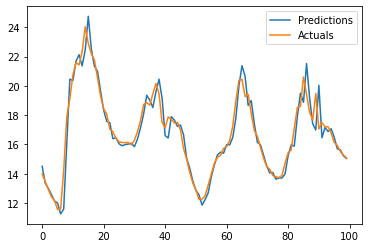

In [53]:
plot_predictions1(model3, X_test, y_test)

In [56]:
temp_df = pd.DataFrame(data = {"Temperature": temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [57]:
day = 60*60*24
year = day*365.2425

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df

,Temperature,Seconds,Day sin
Date Time,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926
...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590


In [58]:
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2* np.pi / year))
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


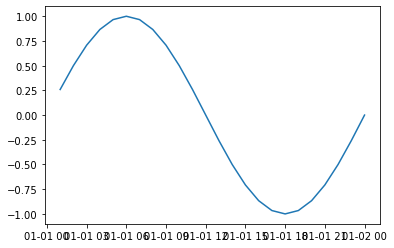

In [66]:
plt.plot(temp_df['Day sin'][:24])

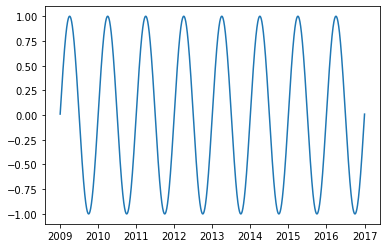

In [65]:
plt.plot(temp_df['Year sin'])

In [64]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


### making a new function with 6 window size for multivariate analysis

In [80]:
# [[[t1, ds1], [t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5]]] [t6]
# [[[t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6]]] [t7]
# [[[t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6], [t7, ds7]]] [t8]

def df_to_X_y2(df, window_size = 6):
    df_np = df.to_numpy()
    #(X shape = num of training sample * no. of time steps * no. of variables)
    X = [] # first five values
    y = [] # output (the next 7th value)
    for i in range(len(df_np)-window_size):
        row = [r for r in df_np[i:i+window_size]]
        X.append(row)
        label = df_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [68]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [69]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, X2_test.shape, X2_val.shape, y2_train.shape, y2_test.shape, y2_val.shape

((60000, 6, 5), (5085, 6, 5), (5000, 6, 5), (60000,), (5085,), (5000,))

# Preprocessing

In [70]:
temp_training_mean = np.mean(X2_train[: ,: ,0])
temp_traing_std = np.std(X2_train[:, :, 0])

def preprocessing(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean / temp_traing_std)
    return X

In [71]:
preprocessing(X2_train)
preprocessing(X2_val)
preprocessing(X2_test)

array([[[ 1.71627514e+01, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 1.67427514e+01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 1.55427514e+01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 1.47427514e+01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 1.39827514e+01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 1.28827514e+01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 1.67427514e+01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 1.55427514e+01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 1.47427514e+01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 1.39827514e+01, -2.58819045e-01,  9.65925826e-01,
  

In [72]:
model4 = Sequential()
model4.add(InputLayer((6,5))) # a batch of 6 and 5 variables
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear')) # output

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [73]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [74]:
model4.fit(X2_train, y2_train, validation_data = (X2_val, y2_val), epochs=100, callbacks=[cp4])

Epoch 1/100
1859/1875 [============================>.] - ETA: 0s - loss: 150.9196 - root_mean_squared_error: 12.2849

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 25s 12ms/step - loss: 150.6010 - root_mean_squared_error: 12.2720 - val_loss: 57.1023 - val_root_mean_squared_error: 7.5566
Epoch 2/100
1869/1875 [============================>.] - ETA: 0s - loss: 99.2140 - root_mean_squared_error: 9.9606

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 99.2083 - root_mean_squared_error: 9.9603 - val_loss: 26.4409 - val_root_mean_squared_error: 5.1421
Epoch 3/100
1869/1875 [============================>.] - ETA: 0s - loss: 57.3817 - root_mean_squared_error: 7.5751

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 27s 14ms/step - loss: 57.3197 - root_mean_squared_error: 7.5710 - val_loss: 14.0781 - val_root_mean_squared_error: 3.7521
Epoch 4/100
1871/1875 [============================>.] - ETA: 0s - loss: 34.5744 - root_mean_squared_error: 5.8800

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 36s 19ms/step - loss: 34.5816 - root_mean_squared_error: 5.8806 - val_loss: 7.0984 - val_root_mean_squared_error: 2.6643
Epoch 5/100
1872/1875 [============================>.] - ETA: 0s - loss: 21.5687 - root_mean_squared_error: 4.6442

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 21.5584 - root_mean_squared_error: 4.6431 - val_loss: 4.2842 - val_root_mean_squared_error: 2.0698
Epoch 6/100
1867/1875 [============================>.] - ETA: 0s - loss: 14.2022 - root_mean_squared_error: 3.7686

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 14.1873 - root_mean_squared_error: 3.7666 - val_loss: 2.7705 - val_root_mean_squared_error: 1.6645
Epoch 7/100
1870/1875 [============================>.] - ETA: 0s - loss: 9.3525 - root_mean_squared_error: 3.0582

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 9.3372 - root_mean_squared_error: 3.0557 - val_loss: 1.8309 - val_root_mean_squared_error: 1.3531
Epoch 8/100
1869/1875 [============================>.] - ETA: 0s - loss: 6.1199 - root_mean_squared_error: 2.4738

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 6.1145 - root_mean_squared_error: 2.4728 - val_loss: 1.2646 - val_root_mean_squared_error: 1.1245
Epoch 9/100
1875/1875 [==============================] - ETA: 0s - loss: 4.0351 - root_mean_squared_error: 2.0088

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 33s 17ms/step - loss: 4.0351 - root_mean_squared_error: 2.0088 - val_loss: 0.9361 - val_root_mean_squared_error: 0.9675
Epoch 10/100
1867/1875 [============================>.] - ETA: 0s - loss: 2.7294 - root_mean_squared_error: 1.6521

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 2.7231 - root_mean_squared_error: 1.6502 - val_loss: 0.7337 - val_root_mean_squared_error: 0.8566
Epoch 11/100
1873/1875 [============================>.] - ETA: 0s - loss: 1.9025 - root_mean_squared_error: 1.3793

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 31s 17ms/step - loss: 1.9010 - root_mean_squared_error: 1.3788 - val_loss: 0.6135 - val_root_mean_squared_error: 0.7833
Epoch 12/100
1871/1875 [============================>.] - ETA: 0s - loss: 1.4072 - root_mean_squared_error: 1.1863

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 31s 16ms/step - loss: 1.4070 - root_mean_squared_error: 1.1862 - val_loss: 0.5433 - val_root_mean_squared_error: 0.7371
Epoch 13/100
1865/1875 [============================>.] - ETA: 0s - loss: 1.1122 - root_mean_squared_error: 1.0546

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 1.1106 - root_mean_squared_error: 1.0538 - val_loss: 0.5010 - val_root_mean_squared_error: 0.7078
Epoch 14/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.9298 - root_mean_squared_error: 0.9643

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 25s 14ms/step - loss: 0.9302 - root_mean_squared_error: 0.9645 - val_loss: 0.4769 - val_root_mean_squared_error: 0.6906
Epoch 15/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.8196 - root_mean_squared_error: 0.9053

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 37s 20ms/step - loss: 0.8191 - root_mean_squared_error: 0.9050 - val_loss: 0.4619 - val_root_mean_squared_error: 0.6797
Epoch 16/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.7467 - root_mean_squared_error: 0.8641

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.7466 - root_mean_squared_error: 0.8641 - val_loss: 0.4520 - val_root_mean_squared_error: 0.6723
Epoch 17/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.6982 - root_mean_squared_error: 0.8356

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.6981 - root_mean_squared_error: 0.8355 - val_loss: 0.4452 - val_root_mean_squared_error: 0.6672
Epoch 18/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.6646 - root_mean_squared_error: 0.8152

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.6644 - root_mean_squared_error: 0.8151 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6646
Epoch 19/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.6397 - root_mean_squared_error: 0.7998

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 37s 20ms/step - loss: 0.6403 - root_mean_squared_error: 0.8002 - val_loss: 0.4381 - val_root_mean_squared_error: 0.6619
Epoch 20/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.6229 - root_mean_squared_error: 0.7893

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 0.6224 - root_mean_squared_error: 0.7889 - val_loss: 0.4354 - val_root_mean_squared_error: 0.6598
Epoch 21/100
1866/1875 [============================>.] - ETA: 0s - loss: 0.6091 - root_mean_squared_error: 0.7805

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 29s 16ms/step - loss: 0.6087 - root_mean_squared_error: 0.7802 - val_loss: 0.4319 - val_root_mean_squared_error: 0.6572
Epoch 22/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.5978 - root_mean_squared_error: 0.7732

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 31s 16ms/step - loss: 0.5977 - root_mean_squared_error: 0.7731 - val_loss: 0.4302 - val_root_mean_squared_error: 0.6559
Epoch 23/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.5894 - root_mean_squared_error: 0.7677

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.5888 - root_mean_squared_error: 0.7673 - val_loss: 0.4281 - val_root_mean_squared_error: 0.6543
Epoch 24/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.5821 - root_mean_squared_error: 0.7630

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 27s 14ms/step - loss: 0.5814 - root_mean_squared_error: 0.7625 - val_loss: 0.4273 - val_root_mean_squared_error: 0.6536
Epoch 25/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.5759 - root_mean_squared_error: 0.7589

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 0.5753 - root_mean_squared_error: 0.7585 - val_loss: 0.4259 - val_root_mean_squared_error: 0.6526
Epoch 26/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.5693 - root_mean_squared_error: 0.7545

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.5699 - root_mean_squared_error: 0.7549 - val_loss: 0.4248 - val_root_mean_squared_error: 0.6517
Epoch 27/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.5653 - root_mean_squared_error: 0.7519

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.5650 - root_mean_squared_error: 0.7517 - val_loss: 0.4226 - val_root_mean_squared_error: 0.6501
Epoch 28/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.5612 - root_mean_squared_error: 0.7492

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.5610 - root_mean_squared_error: 0.7490 - val_loss: 0.4215 - val_root_mean_squared_error: 0.6492
Epoch 29/100
1875/1875 [==============================] - ETA: 0s - loss: 0.5572 - root_mean_squared_error: 0.7465

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 0.5572 - root_mean_squared_error: 0.7465 - val_loss: 0.4209 - val_root_mean_squared_error: 0.6488
Epoch 30/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.5539 - root_mean_squared_error: 0.7442

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 0.5538 - root_mean_squared_error: 0.7442 - val_loss: 0.4195 - val_root_mean_squared_error: 0.6477
Epoch 31/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.5510 - root_mean_squared_error: 0.7423

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 0.5508 - root_mean_squared_error: 0.7422 - val_loss: 0.4188 - val_root_mean_squared_error: 0.6472
Epoch 32/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.5483 - root_mean_squared_error: 0.7405

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 31s 16ms/step - loss: 0.5480 - root_mean_squared_error: 0.7402 - val_loss: 0.4183 - val_root_mean_squared_error: 0.6468
Epoch 33/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.5454 - root_mean_squared_error: 0.7385

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 31s 17ms/step - loss: 0.5453 - root_mean_squared_error: 0.7384 - val_loss: 0.4175 - val_root_mean_squared_error: 0.6462
Epoch 34/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.5433 - root_mean_squared_error: 0.7371

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 31s 17ms/step - loss: 0.5431 - root_mean_squared_error: 0.7370 - val_loss: 0.4168 - val_root_mean_squared_error: 0.6456
Epoch 35/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5409 - root_mean_squared_error: 0.7354 - val_loss: 0.4170 - val_root_mean_squared_error: 0.6458
Epoch 36/100
1875/1875 [==============================] - ETA: 0s - loss: 0.5387 - root_mean_squared_error: 0.7340

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 34s 18ms/step - loss: 0.5387 - root_mean_squared_error: 0.7340 - val_loss: 0.4162 - val_root_mean_squared_error: 0.6451
Epoch 37/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.5371 - root_mean_squared_error: 0.7329

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.5369 - root_mean_squared_error: 0.7328 - val_loss: 0.4145 - val_root_mean_squared_error: 0.6438
Epoch 38/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5352 - root_mean_squared_error: 0.7316 - val_loss: 0.4152 - val_root_mean_squared_error: 0.6444
Epoch 39/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5335 - root_mean_squared_error: 0.7304 - val_loss: 0.4150 - val_root_mean_squared_error: 0.6442
Epoch 40/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.5320 - root_mean_squared_error: 0.7294

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.5321 - root_mean_squared_error: 0.7294 - val_loss: 0.4142 - val_root_mean_squared_error: 0.6436
Epoch 41/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5307 - root_mean_squared_error: 0.7285 - val_loss: 0.4143 - val_root_mean_squared_error: 0.6437
Epoch 42/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.5290 - root_mean_squared_error: 0.7273

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 0.5295 - root_mean_squared_error: 0.7276 - val_loss: 0.4128 - val_root_mean_squared_error: 0.6425
Epoch 43/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5281 - root_mean_squared_error: 0.7267 - val_loss: 0.4133 - val_root_mean_squared_error: 0.6429
Epoch 44/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5269 - root_mean_squared_error: 0.7259 - val_loss: 0.4141 - val_root_mean_squared_error: 0.6435
Epoch 45/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.5258 - root_mean_squared_error: 0.7251

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.5260 - root_mean_squared_error: 0.7252 - val_loss: 0.4116 - val_root_mean_squared_error: 0.6416
Epoch 46/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5248 - root_mean_squared_error: 0.7244 - val_loss: 0.4121 - val_root_mean_squared_error: 0.6419
Epoch 47/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.5239 - root_mean_squared_error: 0.7238

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 31s 16ms/step - loss: 0.5239 - root_mean_squared_error: 0.7238 - val_loss: 0.4113 - val_root_mean_squared_error: 0.6413
Epoch 48/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5230 - root_mean_squared_error: 0.7232 - val_loss: 0.4113 - val_root_mean_squared_error: 0.6414
Epoch 49/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.5225 - root_mean_squared_error: 0.7228

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.5218 - root_mean_squared_error: 0.7224 - val_loss: 0.4111 - val_root_mean_squared_error: 0.6412
Epoch 50/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.5210 - root_mean_squared_error: 0.7218

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.5210 - root_mean_squared_error: 0.7218 - val_loss: 0.4089 - val_root_mean_squared_error: 0.6395
Epoch 51/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5202 - root_mean_squared_error: 0.7212 - val_loss: 0.4103 - val_root_mean_squared_error: 0.6405
Epoch 52/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5194 - root_mean_squared_error: 0.7207 - val_loss: 0.4092 - val_root_mean_squared_error: 0.6397
Epoch 53/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.5185 - root_mean_squared_error: 0.7201

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 27s 14ms/step - loss: 0.5186 - root_mean_squared_error: 0.7201 - val_loss: 0.4082 - val_root_mean_squared_error: 0.6389
Epoch 54/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5179 - root_mean_squared_error: 0.7196 - val_loss: 0.4091 - val_root_mean_squared_error: 0.6396
Epoch 55/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.5164 - root_mean_squared_error: 0.7186

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 0.5172 - root_mean_squared_error: 0.7191 - val_loss: 0.4082 - val_root_mean_squared_error: 0.6389
Epoch 56/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5166 - root_mean_squared_error: 0.7187 - val_loss: 0.4089 - val_root_mean_squared_error: 0.6394
Epoch 57/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5157 - root_mean_squared_error: 0.7181 - val_loss: 0.4109 - val_root_mean_squared_error: 0.6410
Epoch 58/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.5155 - root_mean_squared_error: 0.7180

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.5153 - root_mean_squared_error: 0.7178 - val_loss: 0.4067 - val_root_mean_squared_error: 0.6377
Epoch 59/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5145 - root_mean_squared_error: 0.7173 - val_loss: 0.4084 - val_root_mean_squared_error: 0.6391
Epoch 60/100
1875/1875 [==============================] - ETA: 0s - loss: 0.5139 - root_mean_squared_error: 0.7169

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.5139 - root_mean_squared_error: 0.7169 - val_loss: 0.4066 - val_root_mean_squared_error: 0.6377
Epoch 61/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5136 - root_mean_squared_error: 0.7167 - val_loss: 0.4075 - val_root_mean_squared_error: 0.6384
Epoch 62/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.5127 - root_mean_squared_error: 0.7161

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.5128 - root_mean_squared_error: 0.7161 - val_loss: 0.4058 - val_root_mean_squared_error: 0.6371
Epoch 63/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.5122 - root_mean_squared_error: 0.7157

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 31s 16ms/step - loss: 0.5125 - root_mean_squared_error: 0.7159 - val_loss: 0.4053 - val_root_mean_squared_error: 0.6366
Epoch 64/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5119 - root_mean_squared_error: 0.7155 - val_loss: 0.4058 - val_root_mean_squared_error: 0.6370
Epoch 65/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5112 - root_mean_squared_error: 0.7150 - val_loss: 0.4062 - val_root_mean_squared_error: 0.6374
Epoch 66/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5110 - root_mean_squared_error: 0.7148 - val_loss: 0.4087 - val_root_mean_squared_error: 0.6393
Epoch 67/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5105 - root_mean_squared_error: 0.7145 - val_loss: 0.4059 - val_root_mean_squared_error: 0.6371
Epoch 68/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5100 - root_mean_squared_error: 0.7142 - val_l

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 90s 48ms/step - loss: 0.5092 - root_mean_squared_error: 0.7136 - val_loss: 0.4032 - val_root_mean_squared_error: 0.6350
Epoch 71/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5086 - root_mean_squared_error: 0.7131 - val_loss: 0.4039 - val_root_mean_squared_error: 0.6355
Epoch 72/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5084 - root_mean_squared_error: 0.7131 - val_loss: 0.4033 - val_root_mean_squared_error: 0.6351
Epoch 73/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5082 - root_mean_squared_error: 0.7128 - val_loss: 0.4045 - val_root_mean_squared_error: 0.6360
Epoch 74/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5076 - root_mean_squared_error: 0.7125 - val_loss: 0.4077 - val_root_mean_squared_error: 0.6385
Epoch 75/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.5069 - root_mean_squared_error: 0.7120

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 16s 9ms/step - loss: 0.5072 - root_mean_squared_error: 0.7122 - val_loss: 0.4030 - val_root_mean_squared_error: 0.6348
Epoch 76/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5069 - root_mean_squared_error: 0.7120 - val_loss: 0.4032 - val_root_mean_squared_error: 0.6350
Epoch 77/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5064 - root_mean_squared_error: 0.7116 - val_loss: 0.4041 - val_root_mean_squared_error: 0.6357
Epoch 78/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5060 - root_mean_squared_error: 0.7113 - val_loss: 0.4042 - val_root_mean_squared_error: 0.6358
Epoch 79/100
1875/1875 [==============================] - ETA: 0s - loss: 0.5058 - root_mean_squared_error: 0.7112

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 0.5058 - root_mean_squared_error: 0.7112 - val_loss: 0.4025 - val_root_mean_squared_error: 0.6344
Epoch 80/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5055 - root_mean_squared_error: 0.7110 - val_loss: 0.4037 - val_root_mean_squared_error: 0.6353
Epoch 81/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.5053 - root_mean_squared_error: 0.7108

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 0.5052 - root_mean_squared_error: 0.7108 - val_loss: 0.4014 - val_root_mean_squared_error: 0.6335
Epoch 82/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5047 - root_mean_squared_error: 0.7104 - val_loss: 0.4018 - val_root_mean_squared_error: 0.6338
Epoch 83/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5043 - root_mean_squared_error: 0.7101 - val_loss: 0.4031 - val_root_mean_squared_error: 0.6349
Epoch 84/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.5041 - root_mean_squared_error: 0.7100

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.5041 - root_mean_squared_error: 0.7100 - val_loss: 0.3999 - val_root_mean_squared_error: 0.6324
Epoch 85/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5039 - root_mean_squared_error: 0.7099 - val_loss: 0.4024 - val_root_mean_squared_error: 0.6343
Epoch 86/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5035 - root_mean_squared_error: 0.7096 - val_loss: 0.4024 - val_root_mean_squared_error: 0.6344
Epoch 87/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.5035 - root_mean_squared_error: 0.7096

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 0.5034 - root_mean_squared_error: 0.7095 - val_loss: 0.3999 - val_root_mean_squared_error: 0.6324
Epoch 88/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5030 - root_mean_squared_error: 0.7092 - val_loss: 0.4016 - val_root_mean_squared_error: 0.6337
Epoch 89/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5027 - root_mean_squared_error: 0.7090 - val_loss: 0.4010 - val_root_mean_squared_error: 0.6332
Epoch 90/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5023 - root_mean_squared_error: 0.7087 - val_loss: 0.4058 - val_root_mean_squared_error: 0.6370
Epoch 91/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5021 - root_mean_squared_error: 0.7086 - val_loss: 0.4000 - val_root_mean_squared_error: 0.6325
Epoch 92/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5019 - root_mean_squared_error: 0.7084 - val_loss: 

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 16s 9ms/step - loss: 0.5013 - root_mean_squared_error: 0.7080 - val_loss: 0.3989 - val_root_mean_squared_error: 0.6316
Epoch 95/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5010 - root_mean_squared_error: 0.7078 - val_loss: 0.3992 - val_root_mean_squared_error: 0.6318
Epoch 96/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5007 - root_mean_squared_error: 0.7076 - val_loss: 0.4007 - val_root_mean_squared_error: 0.6330
Epoch 97/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5004 - root_mean_squared_error: 0.7074 - val_loss: 0.4001 - val_root_mean_squared_error: 0.6325
Epoch 98/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.5003 - root_mean_squared_error: 0.7073

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.5003 - root_mean_squared_error: 0.7073 - val_loss: 0.3989 - val_root_mean_squared_error: 0.6315
Epoch 99/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4998 - root_mean_squared_error: 0.7070 - val_loss: 0.4025 - val_root_mean_squared_error: 0.6344
Epoch 100/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.4999 - root_mean_squared_error: 0.7070

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 16s 9ms/step - loss: 0.5000 - root_mean_squared_error: 0.7071 - val_loss: 0.3988 - val_root_mean_squared_error: 0.6315


159/159 [==============================] - 2s 3ms/step


(      Predictions  Actuals
 0       13.277949    13.46
 1       12.871652    12.93
 2       12.396085    12.43
 3       12.061140    12.17
 4       12.253438    11.55
 ...           ...      ...
 5080    -1.033504    -0.98
 5081    -1.413181    -1.40
 5082    -1.700899    -2.75
 5083    -3.161933    -2.89
 5084    -3.158471    -3.93
 
 [5085 rows x 2 columns],
 0.4624518420204784)

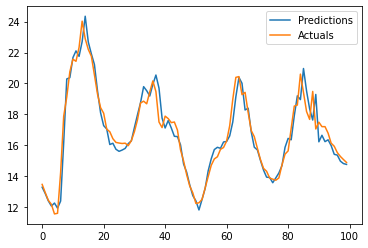

In [75]:
plot_predictions1(model4, X2_test, y2_test)

#### Adding 'pressure' to the dataframe

In [77]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965


Making a new function again...

In [86]:
# [[[t1, ds1], [t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5]]] [t6]
# [[[t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6]]] [t7]
# [[[t3, ds3], [t4, ds4], [t5, ds5], [t6, ds6], [t7, ds7]]] [t8]

def df_to_X_y3(df, window_size = 7):
    df_np = df.to_numpy()
    #(X shape = num of training sample * no. of time steps * no. of variables)
    X = [] # first five values
    y = [] # output (the next 7th value)
    for i in range(len(df_np)-window_size):
        row = [r for r in df_np[i:i+window_size]]
        X.append(row)
        label = [df_np[i+window_size][0],df_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)

In [87]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [88]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, X3_test.shape, X3_val.shape, y3_train.shape, y3_test.shape, y2_val.shape

((60000, 7, 6), (5084, 7, 6), (5000, 7, 6), (60000, 2), (5084, 2), (5000,))

In [93]:
p_training_mean = np.mean(X3_train[:,:,0])
p_training_std = np.std(X3_train[:,:,0])
temp_training_mean = np.mean(X3_train[:,:,1])
temp_training_std = np.std(X3_train[:,:,1])

def preprocess3(X):
    X[:,:,0] = (X[:,:,0] - p_training_mean / p_training_std)
    X[:,:,1] = (X[:,:,1] - temp_training_mean / temp_training_std)
    return X
    
def preprocess_output3(y):
    y[:,0] = (y[:,0] - p_training_mean / p_training_std)
    y[:,1] = (y[:,1] - temp_training_mean / temp_training_std)
    return y

In [94]:
preprocess3(X3_train)
preprocess3(X3_test)
preprocess3(X3_val)

preprocess_output3(y3_test)
preprocess_output(y3_train)
preprocess_output(y3_val)

array([[796.39235761,  10.43055979],
       [796.66235761,   9.35055979],
       [796.61235761,   9.01055979],
       ...,
       [783.72235761,  13.25055979],
       [784.14235761,  12.15055979],
       [784.37235761,  11.62055979]])

In [95]:
model5 = Sequential()
model5.add(InputLayer((7,6))) # a batch of 7 and 6 variables
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear')) # 2 outputs

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [96]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [97]:
model5.fit(X3_train, y3_train, validation_data = (X3_val, y3_val), epochs=100, callbacks=[cp5])

Epoch 1/100
1861/1875 [============================>.] - ETA: 0s - loss: 312367.2812 - root_mean_squared_error: 558.8983

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 11ms/step - loss: 312362.9062 - root_mean_squared_error: 558.8944 - val_loss: 311776.9062 - val_root_mean_squared_error: 558.3699
Epoch 2/100
1873/1875 [============================>.] - ETA: 0s - loss: 311753.0312 - root_mean_squared_error: 558.3485

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 20s 10ms/step - loss: 311752.7500 - root_mean_squared_error: 558.3482 - val_loss: 311357.5312 - val_root_mean_squared_error: 557.9942
Epoch 3/100
1860/1875 [============================>.] - ETA: 0s - loss: 311319.2188 - root_mean_squared_error: 557.9598

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 20s 10ms/step - loss: 311321.4375 - root_mean_squared_error: 557.9619 - val_loss: 310918.5625 - val_root_mean_squared_error: 557.6008
Epoch 4/100
1865/1875 [============================>.] - ETA: 0s - loss: 310877.0625 - root_mean_squared_error: 557.5635

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 310874.5312 - root_mean_squared_error: 557.5612 - val_loss: 310454.7812 - val_root_mean_squared_error: 557.1846
Epoch 5/100
1863/1875 [============================>.] - ETA: 0s - loss: 310388.2500 - root_mean_squared_error: 557.1250

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 310387.7812 - root_mean_squared_error: 557.1246 - val_loss: 309948.2500 - val_root_mean_squared_error: 556.7300
Epoch 6/100
1874/1875 [============================>.] - ETA: 0s - loss: 309849.5312 - root_mean_squared_error: 556.6413

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 309848.8750 - root_mean_squared_error: 556.6407 - val_loss: 309369.3438 - val_root_mean_squared_error: 556.2098
Epoch 7/100
1872/1875 [============================>.] - ETA: 0s - loss: 309243.8750 - root_mean_squared_error: 556.0970

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 309241.2188 - root_mean_squared_error: 556.0946 - val_loss: 308750.6562 - val_root_mean_squared_error: 555.6534
Epoch 8/100
1875/1875 [==============================] - ETA: 0s - loss: 308599.7500 - root_mean_squared_error: 555.5176

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 308599.7500 - root_mean_squared_error: 555.5176 - val_loss: 308083.7500 - val_root_mean_squared_error: 555.0530
Epoch 9/100
1872/1875 [============================>.] - ETA: 0s - loss: 307838.3125 - root_mean_squared_error: 554.8317

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 307838.2812 - root_mean_squared_error: 554.8317 - val_loss: 307267.8438 - val_root_mean_squared_error: 554.3174
Epoch 10/100
1873/1875 [============================>.] - ETA: 0s - loss: 307044.0938 - root_mean_squared_error: 554.1155

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 307043.6250 - root_mean_squared_error: 554.1152 - val_loss: 306471.1562 - val_root_mean_squared_error: 553.5984
Epoch 11/100
1863/1875 [============================>.] - ETA: 0s - loss: 306229.2812 - root_mean_squared_error: 553.3799

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 306223.8125 - root_mean_squared_error: 553.3749 - val_loss: 305631.1250 - val_root_mean_squared_error: 552.8392
Epoch 12/100
1872/1875 [============================>.] - ETA: 0s - loss: 305358.6250 - root_mean_squared_error: 552.5927

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 305358.5938 - root_mean_squared_error: 552.5926 - val_loss: 304745.3750 - val_root_mean_squared_error: 552.0375
Epoch 13/100
1866/1875 [============================>.] - ETA: 0s - loss: 304452.4375 - root_mean_squared_error: 551.7720

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 14s 8ms/step - loss: 304448.4062 - root_mean_squared_error: 551.7684 - val_loss: 303813.6250 - val_root_mean_squared_error: 551.1929
Epoch 14/100
1871/1875 [============================>.] - ETA: 0s - loss: 303495.6562 - root_mean_squared_error: 550.9044

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 303492.5938 - root_mean_squared_error: 550.9016 - val_loss: 302836.0000 - val_root_mean_squared_error: 550.3054
Epoch 15/100
1872/1875 [============================>.] - ETA: 0s - loss: 302491.6875 - root_mean_squared_error: 549.9924

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 302491.7812 - root_mean_squared_error: 549.9926 - val_loss: 301813.2500 - val_root_mean_squared_error: 549.3753
Epoch 16/100
1875/1875 [==============================] - ETA: 0s - loss: 301445.6875 - root_mean_squared_error: 549.0407

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 37s 20ms/step - loss: 301445.6875 - root_mean_squared_error: 549.0407 - val_loss: 300745.1250 - val_root_mean_squared_error: 548.4023
Epoch 17/100
1871/1875 [============================>.] - ETA: 0s - loss: 300357.0000 - root_mean_squared_error: 548.0483

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 41s 22ms/step - loss: 300354.6562 - root_mean_squared_error: 548.0462 - val_loss: 299632.5000 - val_root_mean_squared_error: 547.3870
Epoch 18/100
1869/1875 [============================>.] - ETA: 0s - loss: 299220.7812 - root_mean_squared_error: 547.0107

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 299219.4062 - root_mean_squared_error: 547.0095 - val_loss: 298475.5625 - val_root_mean_squared_error: 546.3292
Epoch 19/100
1875/1875 [==============================] - ETA: 0s - loss: 297904.1875 - root_mean_squared_error: 545.8060

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 297904.1875 - root_mean_squared_error: 545.8060 - val_loss: 297098.1562 - val_root_mean_squared_error: 545.0671
Epoch 20/100
1861/1875 [============================>.] - ETA: 0s - loss: 296637.7500 - root_mean_squared_error: 544.6446

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 296633.0000 - root_mean_squared_error: 544.6403 - val_loss: 295838.5000 - val_root_mean_squared_error: 543.9104
Epoch 21/100
1865/1875 [============================>.] - ETA: 0s - loss: 295356.0938 - root_mean_squared_error: 543.4667

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 295352.1875 - root_mean_squared_error: 543.4631 - val_loss: 294536.2500 - val_root_mean_squared_error: 542.7119
Epoch 22/100
1868/1875 [============================>.] - ETA: 0s - loss: 294030.3125 - root_mean_squared_error: 542.2456

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 294028.0000 - root_mean_squared_error: 542.2435 - val_loss: 293191.3750 - val_root_mean_squared_error: 541.4715
Epoch 23/100
1869/1875 [============================>.] - ETA: 0s - loss: 292663.6875 - root_mean_squared_error: 540.9840

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 292662.0938 - root_mean_squared_error: 540.9825 - val_loss: 291803.4688 - val_root_mean_squared_error: 540.1884
Epoch 24/100
1866/1875 [============================>.] - ETA: 0s - loss: 291254.7500 - root_mean_squared_error: 539.6802

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 291251.8438 - root_mean_squared_error: 539.6776 - val_loss: 290372.1875 - val_root_mean_squared_error: 538.8619
Epoch 25/100
1868/1875 [============================>.] - ETA: 0s - loss: 289792.0312 - root_mean_squared_error: 538.3234

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 14ms/step - loss: 289786.0000 - root_mean_squared_error: 538.3177 - val_loss: 288619.4062 - val_root_mean_squared_error: 537.2331
Epoch 26/100
1874/1875 [============================>.] - ETA: 0s - loss: 288010.0000 - root_mean_squared_error: 536.6656

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 288009.6250 - root_mean_squared_error: 536.6653 - val_loss: 287077.0000 - val_root_mean_squared_error: 535.7957
Epoch 27/100
1874/1875 [============================>.] - ETA: 0s - loss: 286452.6562 - root_mean_squared_error: 535.2127

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 286453.7500 - root_mean_squared_error: 535.2137 - val_loss: 285503.2188 - val_root_mean_squared_error: 534.3250
Epoch 28/100
1871/1875 [============================>.] - ETA: 0s - loss: 284861.7500 - root_mean_squared_error: 533.7244

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 14ms/step - loss: 284859.7188 - root_mean_squared_error: 533.7225 - val_loss: 283889.4375 - val_root_mean_squared_error: 532.8127
Epoch 29/100
1871/1875 [============================>.] - ETA: 0s - loss: 283226.6562 - root_mean_squared_error: 532.1904

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 27s 14ms/step - loss: 283225.6250 - root_mean_squared_error: 532.1895 - val_loss: 282235.0312 - val_root_mean_squared_error: 531.2580
Epoch 30/100
1863/1875 [============================>.] - ETA: 0s - loss: 281556.2500 - root_mean_squared_error: 530.6188

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 281550.6250 - root_mean_squared_error: 530.6135 - val_loss: 280540.1875 - val_root_mean_squared_error: 529.6605
Epoch 31/100
1870/1875 [============================>.] - ETA: 0s - loss: 279838.5312 - root_mean_squared_error: 528.9977

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 33s 18ms/step - loss: 279835.2500 - root_mean_squared_error: 528.9946 - val_loss: 278805.0625 - val_root_mean_squared_error: 528.0200
Epoch 32/100
1873/1875 [============================>.] - ETA: 0s - loss: 278080.1250 - root_mean_squared_error: 527.3330

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 278079.5938 - root_mean_squared_error: 527.3325 - val_loss: 277029.5938 - val_root_mean_squared_error: 526.3360
Epoch 33/100
1871/1875 [============================>.] - ETA: 0s - loss: 276284.6875 - root_mean_squared_error: 525.6279

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 276283.9688 - root_mean_squared_error: 525.6272 - val_loss: 275214.3750 - val_root_mean_squared_error: 524.6088
Epoch 34/100
1872/1875 [============================>.] - ETA: 0s - loss: 274449.0625 - root_mean_squared_error: 523.8788

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 27s 15ms/step - loss: 274448.4062 - root_mean_squared_error: 523.8782 - val_loss: 273359.7500 - val_root_mean_squared_error: 522.8382
Epoch 35/100
1861/1875 [============================>.] - ETA: 0s - loss: 272576.1250 - root_mean_squared_error: 522.0883

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 272573.8750 - root_mean_squared_error: 522.0861 - val_loss: 271466.4062 - val_root_mean_squared_error: 521.0244
Epoch 36/100
1872/1875 [============================>.] - ETA: 0s - loss: 270663.4688 - root_mean_squared_error: 520.2532

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 270661.0312 - root_mean_squared_error: 520.2509 - val_loss: 269534.8438 - val_root_mean_squared_error: 519.1675
Epoch 37/100
1862/1875 [============================>.] - ETA: 0s - loss: 268717.4062 - root_mean_squared_error: 518.3796

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 268710.0000 - root_mean_squared_error: 518.3724 - val_loss: 267565.6562 - val_root_mean_squared_error: 517.2675
Epoch 38/100
1873/1875 [============================>.] - ETA: 0s - loss: 266723.6250 - root_mean_squared_error: 516.4529

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 266722.0625 - root_mean_squared_error: 516.4514 - val_loss: 265559.7812 - val_root_mean_squared_error: 515.3250
Epoch 39/100
1870/1875 [============================>.] - ETA: 0s - loss: 264698.5312 - root_mean_squared_error: 514.4886

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 264696.9062 - root_mean_squared_error: 514.4871 - val_loss: 263517.8750 - val_root_mean_squared_error: 513.3399
Epoch 40/100
1875/1875 [==============================] - ETA: 0s - loss: 262637.0312 - root_mean_squared_error: 512.4812

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 29s 15ms/step - loss: 262637.0312 - root_mean_squared_error: 512.4812 - val_loss: 261440.9531 - val_root_mean_squared_error: 511.3130
Epoch 41/100
1871/1875 [============================>.] - ETA: 0s - loss: 260543.8906 - root_mean_squared_error: 510.4350

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 27s 14ms/step - loss: 260542.1875 - root_mean_squared_error: 510.4333 - val_loss: 259329.8125 - val_root_mean_squared_error: 509.2444
Epoch 42/100
1864/1875 [============================>.] - ETA: 0s - loss: 258421.7969 - root_mean_squared_error: 508.3521

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 258413.2031 - root_mean_squared_error: 508.3436 - val_loss: 257183.7969 - val_root_mean_squared_error: 507.1329
Epoch 43/100
1861/1875 [============================>.] - ETA: 0s - loss: 256257.9219 - root_mean_squared_error: 506.2192

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 256250.0156 - root_mean_squared_error: 506.2114 - val_loss: 255004.3125 - val_root_mean_squared_error: 504.9795
Epoch 44/100
1870/1875 [============================>.] - ETA: 0s - loss: 254057.0312 - root_mean_squared_error: 504.0407

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 254052.8750 - root_mean_squared_error: 504.0366 - val_loss: 252791.0625 - val_root_mean_squared_error: 502.7833
Epoch 45/100
1874/1875 [============================>.] - ETA: 0s - loss: 251821.9688 - root_mean_squared_error: 501.8186

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 251822.1094 - root_mean_squared_error: 501.8188 - val_loss: 250543.3281 - val_root_mean_squared_error: 500.5430
Epoch 46/100
1873/1875 [============================>.] - ETA: 0s - loss: 249556.6094 - root_mean_squared_error: 499.5564

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 249557.1406 - root_mean_squared_error: 499.5569 - val_loss: 248262.5781 - val_root_mean_squared_error: 498.2596
Epoch 47/100
1874/1875 [============================>.] - ETA: 0s - loss: 247260.4688 - root_mean_squared_error: 497.2529

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 247259.5625 - root_mean_squared_error: 497.2520 - val_loss: 245950.0312 - val_root_mean_squared_error: 495.9335
Epoch 48/100
1873/1875 [============================>.] - ETA: 0s - loss: 244932.0312 - root_mean_squared_error: 494.9061

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 244930.6250 - root_mean_squared_error: 494.9047 - val_loss: 243606.7031 - val_root_mean_squared_error: 493.5653
Epoch 49/100
1875/1875 [==============================] - ETA: 0s - loss: 242571.1406 - root_mean_squared_error: 492.5151

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 242571.1406 - root_mean_squared_error: 492.5151 - val_loss: 241232.6406 - val_root_mean_squared_error: 491.1544
Epoch 50/100
1869/1875 [============================>.] - ETA: 0s - loss: 240187.8281 - root_mean_squared_error: 490.0896

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 240182.7031 - root_mean_squared_error: 490.0844 - val_loss: 238830.6875 - val_root_mean_squared_error: 488.7031
Epoch 51/100
1874/1875 [============================>.] - ETA: 0s - loss: 237767.1562 - root_mean_squared_error: 487.6137

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 237765.9219 - root_mean_squared_error: 487.6125 - val_loss: 236401.3125 - val_root_mean_squared_error: 486.2112
Epoch 52/100
1862/1875 [============================>.] - ETA: 0s - loss: 235329.4219 - root_mean_squared_error: 485.1076

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 235322.8906 - root_mean_squared_error: 485.1009 - val_loss: 233945.8750 - val_root_mean_squared_error: 483.6795
Epoch 53/100
1873/1875 [============================>.] - ETA: 0s - loss: 232855.7969 - root_mean_squared_error: 482.5513

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 232853.4844 - root_mean_squared_error: 482.5490 - val_loss: 231464.6562 - val_root_mean_squared_error: 481.1077
Epoch 54/100
1866/1875 [============================>.] - ETA: 0s - loss: 230365.0000 - root_mean_squared_error: 479.9636

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 230359.0469 - root_mean_squared_error: 479.9574 - val_loss: 228957.4375 - val_root_mean_squared_error: 478.4950
Epoch 55/100
1865/1875 [============================>.] - ETA: 0s - loss: 227844.3281 - root_mean_squared_error: 477.3304

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 227837.8125 - root_mean_squared_error: 477.3236 - val_loss: 226424.5000 - val_root_mean_squared_error: 475.8408
Epoch 56/100
1865/1875 [============================>.] - ETA: 0s - loss: 225297.5625 - root_mean_squared_error: 474.6552

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 14ms/step - loss: 225291.3125 - root_mean_squared_error: 474.6486 - val_loss: 223865.9531 - val_root_mean_squared_error: 473.1447
Epoch 57/100
1861/1875 [============================>.] - ETA: 0s - loss: 222728.4062 - root_mean_squared_error: 471.9411

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 222719.1250 - root_mean_squared_error: 471.9313 - val_loss: 221282.2344 - val_root_mean_squared_error: 470.4065
Epoch 58/100
1870/1875 [============================>.] - ETA: 0s - loss: 220124.8281 - root_mean_squared_error: 469.1747

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 220122.1875 - root_mean_squared_error: 469.1718 - val_loss: 218673.8750 - val_root_mean_squared_error: 467.6258
Epoch 59/100
1874/1875 [============================>.] - ETA: 0s - loss: 217502.2969 - root_mean_squared_error: 466.3714

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 27s 15ms/step - loss: 217501.2188 - root_mean_squared_error: 466.3703 - val_loss: 216041.5781 - val_root_mean_squared_error: 464.8027
Epoch 60/100
1874/1875 [============================>.] - ETA: 0s - loss: 214858.2188 - root_mean_squared_error: 463.5280

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 214856.5469 - root_mean_squared_error: 463.5262 - val_loss: 213386.1875 - val_root_mean_squared_error: 461.9375
Epoch 61/100
1874/1875 [============================>.] - ETA: 0s - loss: 212189.8750 - root_mean_squared_error: 460.6407

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 212189.0625 - root_mean_squared_error: 460.6398 - val_loss: 210708.2500 - val_root_mean_squared_error: 459.0297
Epoch 62/100
1868/1875 [============================>.] - ETA: 0s - loss: 209504.6719 - root_mean_squared_error: 457.7168

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 27s 14ms/step - loss: 209499.0000 - root_mean_squared_error: 457.7106 - val_loss: 208008.7344 - val_root_mean_squared_error: 456.0797
Epoch 63/100
1875/1875 [==============================] - ETA: 0s - loss: 206787.9531 - root_mean_squared_error: 454.7394

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 206787.9531 - root_mean_squared_error: 454.7394 - val_loss: 205288.1250 - val_root_mean_squared_error: 453.0873
Epoch 64/100
1864/1875 [============================>.] - ETA: 0s - loss: 204067.4219 - root_mean_squared_error: 451.7382

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 204056.6250 - root_mean_squared_error: 451.7263 - val_loss: 202547.3125 - val_root_mean_squared_error: 450.0526
Epoch 65/100
1869/1875 [============================>.] - ETA: 0s - loss: 201309.6094 - root_mean_squared_error: 448.6754

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 201304.9219 - root_mean_squared_error: 448.6702 - val_loss: 199787.1094 - val_root_mean_squared_error: 446.9755
Epoch 66/100
1866/1875 [============================>.] - ETA: 0s - loss: 198542.0781 - root_mean_squared_error: 445.5806

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 198534.4844 - root_mean_squared_error: 445.5721 - val_loss: 197008.0156 - val_root_mean_squared_error: 443.8558
Epoch 67/100
1868/1875 [============================>.] - ETA: 0s - loss: 195750.5156 - root_mean_squared_error: 442.4370

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 195745.1562 - root_mean_squared_error: 442.4309 - val_loss: 194210.9531 - val_root_mean_squared_error: 440.6937
Epoch 68/100
1870/1875 [============================>.] - ETA: 0s - loss: 192941.1406 - root_mean_squared_error: 439.2506

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 192938.7031 - root_mean_squared_error: 439.2478 - val_loss: 191396.6875 - val_root_mean_squared_error: 437.4891
Epoch 69/100
1862/1875 [============================>.] - ETA: 0s - loss: 190124.5469 - root_mean_squared_error: 436.0327

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 190115.2500 - root_mean_squared_error: 436.0221 - val_loss: 188565.9844 - val_root_mean_squared_error: 434.2419
Epoch 70/100
1862/1875 [============================>.] - ETA: 0s - loss: 187282.6875 - root_mean_squared_error: 432.7617

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 187275.8438 - root_mean_squared_error: 432.7538 - val_loss: 185719.8438 - val_root_mean_squared_error: 430.9523
Epoch 71/100
1870/1875 [============================>.] - ETA: 0s - loss: 184424.6250 - root_mean_squared_error: 429.4469

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 184421.1094 - root_mean_squared_error: 429.4428 - val_loss: 182858.9688 - val_root_mean_squared_error: 427.6201
Epoch 72/100
1871/1875 [============================>.] - ETA: 0s - loss: 181554.6094 - root_mean_squared_error: 426.0923

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 181552.0625 - root_mean_squared_error: 426.0893 - val_loss: 179984.1719 - val_root_mean_squared_error: 424.2454
Epoch 73/100
1873/1875 [============================>.] - ETA: 0s - loss: 178670.1875 - root_mean_squared_error: 422.6939

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 178669.7656 - root_mean_squared_error: 422.6934 - val_loss: 177096.3125 - val_root_mean_squared_error: 420.8281
Epoch 74/100
1868/1875 [============================>.] - ETA: 0s - loss: 175781.1250 - root_mean_squared_error: 419.2626

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 175774.8906 - root_mean_squared_error: 419.2552 - val_loss: 174196.5312 - val_root_mean_squared_error: 417.3686
Epoch 75/100
1864/1875 [============================>.] - ETA: 0s - loss: 172875.8125 - root_mean_squared_error: 415.7834

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 172868.0781 - root_mean_squared_error: 415.7741 - val_loss: 171285.2500 - val_root_mean_squared_error: 413.8662
Epoch 76/100
1864/1875 [============================>.] - ETA: 0s - loss: 169961.3906 - root_mean_squared_error: 412.2638

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 169950.7188 - root_mean_squared_error: 412.2508 - val_loss: 168363.8281 - val_root_mean_squared_error: 410.3216
Epoch 77/100
1861/1875 [============================>.] - ETA: 0s - loss: 167036.5000 - root_mean_squared_error: 408.7010

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 167023.2188 - root_mean_squared_error: 408.6848 - val_loss: 165432.8281 - val_root_mean_squared_error: 406.7343
Epoch 78/100
1870/1875 [============================>.] - ETA: 0s - loss: 164091.4688 - root_mean_squared_error: 405.0820

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 164086.8750 - root_mean_squared_error: 405.0764 - val_loss: 162493.2812 - val_root_mean_squared_error: 403.1046
Epoch 79/100
1860/1875 [============================>.] - ETA: 0s - loss: 161155.7031 - root_mean_squared_error: 401.4420

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 14s 7ms/step - loss: 161142.6094 - root_mean_squared_error: 401.4257 - val_loss: 159546.1094 - val_root_mean_squared_error: 399.4322
Epoch 80/100
1865/1875 [============================>.] - ETA: 0s - loss: 158200.0938 - root_mean_squared_error: 397.7437

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 158190.9062 - root_mean_squared_error: 397.7322 - val_loss: 156592.3594 - val_root_mean_squared_error: 395.7175
Epoch 81/100
1863/1875 [============================>.] - ETA: 0s - loss: 155244.1250 - root_mean_squared_error: 394.0103

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 155232.9375 - root_mean_squared_error: 393.9961 - val_loss: 153632.8594 - val_root_mean_squared_error: 391.9603
Epoch 82/100
1873/1875 [============================>.] - ETA: 0s - loss: 152271.9688 - root_mean_squared_error: 390.2204

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 14s 7ms/step - loss: 152270.0000 - root_mean_squared_error: 390.2179 - val_loss: 150668.5938 - val_root_mean_squared_error: 388.1606
Epoch 83/100
1868/1875 [============================>.] - ETA: 0s - loss: 149308.0781 - root_mean_squared_error: 386.4040

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 149302.4375 - root_mean_squared_error: 386.3967 - val_loss: 147700.5469 - val_root_mean_squared_error: 384.3183
Epoch 84/100
1871/1875 [============================>.] - ETA: 0s - loss: 146333.6406 - root_mean_squared_error: 382.5358

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 146331.8750 - root_mean_squared_error: 382.5335 - val_loss: 144729.6406 - val_root_mean_squared_error: 380.4335
Epoch 85/100
1873/1875 [============================>.] - ETA: 0s - loss: 143359.7500 - root_mean_squared_error: 378.6288

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 143358.7812 - root_mean_squared_error: 378.6275 - val_loss: 141756.9688 - val_root_mean_squared_error: 376.5063
Epoch 86/100
1873/1875 [============================>.] - ETA: 0s - loss: 140386.4375 - root_mean_squared_error: 374.6818

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 14s 8ms/step - loss: 140384.4531 - root_mean_squared_error: 374.6791 - val_loss: 138783.3906 - val_root_mean_squared_error: 372.5364
Epoch 87/100
1875/1875 [==============================] - ETA: 0s - loss: 137409.7969 - root_mean_squared_error: 370.6883

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 137409.7969 - root_mean_squared_error: 370.6883 - val_loss: 135810.0156 - val_root_mean_squared_error: 368.5241
Epoch 88/100
1875/1875 [==============================] - ETA: 0s - loss: 134435.6562 - root_mean_squared_error: 366.6547

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 134435.6562 - root_mean_squared_error: 366.6547 - val_loss: 132837.9844 - val_root_mean_squared_error: 364.4694
Epoch 89/100
1866/1875 [============================>.] - ETA: 0s - loss: 131471.0625 - root_mean_squared_error: 362.5894

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 131463.3906 - root_mean_squared_error: 362.5788 - val_loss: 129868.0859 - val_root_mean_squared_error: 360.3721
Epoch 90/100
1865/1875 [============================>.] - ETA: 0s - loss: 128502.4062 - root_mean_squared_error: 358.4723

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 128493.9844 - root_mean_squared_error: 358.4606 - val_loss: 126901.5703 - val_root_mean_squared_error: 356.2325
Epoch 91/100
1875/1875 [==============================] - ETA: 0s - loss: 125528.1719 - root_mean_squared_error: 354.2996

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 125528.1719 - root_mean_squared_error: 354.2996 - val_loss: 123939.3828 - val_root_mean_squared_error: 352.0503
Epoch 92/100
1868/1875 [============================>.] - ETA: 0s - loss: 122574.4141 - root_mean_squared_error: 350.1063

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 122567.3438 - root_mean_squared_error: 350.0962 - val_loss: 120982.4922 - val_root_mean_squared_error: 347.8254
Epoch 93/100
1867/1875 [============================>.] - ETA: 0s - loss: 119619.8984 - root_mean_squared_error: 345.8611

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 119612.3984 - root_mean_squared_error: 345.8503 - val_loss: 118032.1953 - val_root_mean_squared_error: 343.5581
Epoch 94/100
1858/1875 [============================>.] - ETA: 0s - loss: 116675.1641 - root_mean_squared_error: 341.5775

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 116664.4766 - root_mean_squared_error: 341.5618 - val_loss: 115089.4844 - val_root_mean_squared_error: 339.2484
Epoch 95/100
1870/1875 [============================>.] - ETA: 0s - loss: 113727.4609 - root_mean_squared_error: 337.2350

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 113724.7344 - root_mean_squared_error: 337.2310 - val_loss: 112155.5547 - val_root_mean_squared_error: 334.8963
Epoch 96/100
1862/1875 [============================>.] - ETA: 0s - loss: 110802.7344 - root_mean_squared_error: 332.8705

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 110794.1328 - root_mean_squared_error: 332.8575 - val_loss: 109231.2734 - val_root_mean_squared_error: 330.5016
Epoch 97/100
1875/1875 [==============================] - ETA: 0s - loss: 107873.7578 - root_mean_squared_error: 328.4414

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 107873.7578 - root_mean_squared_error: 328.4414 - val_loss: 106317.9609 - val_root_mean_squared_error: 326.0644
Epoch 98/100
1865/1875 [============================>.] - ETA: 0s - loss: 104972.0547 - root_mean_squared_error: 323.9939

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 104965.1406 - root_mean_squared_error: 323.9832 - val_loss: 103416.7656 - val_root_mean_squared_error: 321.5848
Epoch 99/100
1872/1875 [============================>.] - ETA: 0s - loss: 102071.9922 - root_mean_squared_error: 319.4871

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 102069.2656 - root_mean_squared_error: 319.4828 - val_loss: 100528.7891 - val_root_mean_squared_error: 317.0627
Epoch 100/100
1864/1875 [============================>.] - ETA: 0s - loss: 99195.7188 - root_mean_squared_error: 314.9535

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 99186.8828 - root_mean_squared_error: 314.9395 - val_loss: 97655.3281 - val_root_mean_squared_error: 312.4985


In [107]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals':temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals
                            })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    plt.legend(['temp pred', 'temp actuals', 'pressure pred', 'pressure actuals'])
    return df[start:end]

In [109]:
model5 = load_model('model5/')

159/159 [==============================] - 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,7.621724,11.09056,348.990021,784.442358
1,7.621724,10.59056,348.990021,784.692358
2,7.621724,10.33056,348.990021,785.032358
3,7.621724,9.71056,348.990021,785.602358
4,7.621724,9.75056,348.990021,785.602358
...,...,...,...,...
95,7.621726,13.68056,348.990021,787.552358
96,7.621724,13.43056,348.990021,787.692358
97,7.621724,13.23056,348.990021,787.692358
98,7.621724,13.04056,348.990021,787.682358


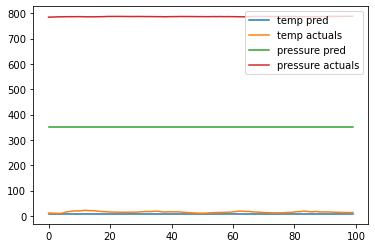

In [111]:
plot_predictions2(model5, X3_test, y3_test,end=100)